# Import data and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
import umap
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from collections import Counter
from collections import defaultdict
import scipy.stats as stats
import networkx as nx
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import adjusted_rand_score
import matplotlib.ticker as ticker
from scipy.cluster.hierarchy import fcluster 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fowlkes_mallows_score
from scipy.cluster.hierarchy import cophenet
import pyranges as pr 

RNA_Bcells = pd.read_csv("data/RNA_Bcells.csv", index_col=0)
ATAC = pd.read_csv("data/converted_ATAC_seq_info.CSV", sep=";")
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC_Bcells = pd.read_csv("data/ATAC_QC_Bcells.csv")

In [2]:
input_path = "data/mmc2.csv"
output_path = "data/converted_RNA_seq_info.csv"

df = pd.read_csv(input_path, sep=",", on_bad_lines='skip', engine="c")  # Robustere Einlesung

df.to_csv(output_path, sep=";", index=False)


print("converted")
RNA = pd.read_csv("data/converted_RNA_seq_info.CSV", sep=";")

converted


# Information about the data


In [3]:
RNA.head()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0610005C13Rik,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,...,1.025785,1.025785,1.251082,1.147249,1.024462,1.019656,1.017884,1.019107,1.017884,1.024720
1,0610007P14Rik,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,...,121.603448,105.140895,101.841463,175.620707,280.406964,200.228029,208.171821,88.578590,129.021874,140.655763
2,0610009B22Rik,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,...,88.691426,73.423656,68.881268,60.811907,56.578015,100.397766,37.373080,73.888468,77.191831,84.245816
3,0610009L18Rik,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,...,6.132818,8.965889,4.080445,11.987408,5.627219,4.227673,2.199352,1.460090,2.482516,1.023995
4,0610009O20Rik,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,...,102.592399,147.139323,130.924354,107.542142,88.338330,100.779150,86.442408,193.307175,187.212720,45.464889


In [4]:
RNA.shape

(17535, 87)

In [5]:
RNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             17535 non-null  object 
 1   LTHSC.34-.BM           17535 non-null  float64
 2   LTHSC.34+.BM           17535 non-null  float64
 3   STHSC.150-.BM          17535 non-null  float64
 4   MPP4.135+.BM           17535 non-null  float64
 5   proB.CLP.BM            17535 non-null  float64
 6   proB.FrA.BM            17535 non-null  float64
 7   proB.FrBC.BM           17535 non-null  float64
 8   B.FrE.BM               17535 non-null  float64
 9   B1b.PC                 17535 non-null  float64
 10  B.T1.Sp                17535 non-null  float64
 11  B.T2.Sp                17535 non-null  float64
 12  B.T3.Sp                17535 non-null  float64
 13  B.Sp                   17535 non-null  float64
 14  B.Fem.Sp               17535 non-null  float64
 15  B.

In [6]:
RNA.describe()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
count,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,...,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000
mean,163.261162,163.261089,163.260318,163.260179,163.258616,163.260821,163.250902,163.230389,163.231197,163.240847,...,163.231841,163.232897,163.259424,163.257744,163.250888,163.262712,163.262576,163.262353,163.263143,163.263501
std,576.884525,576.925735,577.574457,577.409321,571.296896,572.986929,576.360614,577.486414,576.036977,579.134583,...,568.848847,574.484056,577.488941,574.701594,576.090351,576.022402,568.594767,573.821391,575.874869,575.054495
min,1.020795,1.021260,1.021750,1.021812,1.023171,1.021346,1.024462,1.025833,1.025543,1.024819,...,1.025785,1.025785,1.021812,1.022767,1.024462,1.019656,1.017884,1.019107,1.017884,1.000000
25%,1.196112,1.185784,1.170825,1.136401,1.186354,1.207683,1.302727,1.025833,1.025543,1.024819,...,1.025785,1.025785,1.399194,1.201248,1.329025,1.211700,1.238416,1.214558,1.202592,1.239729
50%,22.788066,23.117322,23.353421,22.886122,23.643738,23.433960,22.733714,22.621121,22.491847,22.535442,...,24.862858,24.038368,23.712239,23.334360,22.797685,23.519148,24.950026,23.488316,23.127040,24.057722
75%,144.402771,144.214802,142.951482,144.204604,144.325627,145.034613,144.358893,143.820856,143.574654,143.685106,...,145.299328,144.291059,143.036042,144.642930,143.619884,143.843335,146.255774,144.148455,143.678428,143.780744
max,28264.930700,28264.930700,28264.930700,28264.930700,28264.930700,28264.930700,28264.930700,28264.930700,24538.413450,28264.930700,...,25780.585870,25780.585870,28264.930700,22493.939090,28264.930700,28264.930700,28264.930700,24538.413450,28264.930700,24538.413450


# Data Clean-up

In [7]:
#coloumns with numerical datas for Clustering
RNA_new = RNA.iloc[:, 1:]
RNA_new.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,3.383058,...,1.025785,1.025785,1.251082,1.147249,1.024462,1.019656,1.017884,1.019107,1.017884,1.024720
1,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,138.334965,...,121.603448,105.140895,101.841463,175.620707,280.406964,200.228029,208.171821,88.578590,129.021874,140.655763
2,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,40.460507,...,88.691426,73.423656,68.881268,60.811907,56.578015,100.397766,37.373080,73.888468,77.191831,84.245816
3,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,16.721968,...,6.132818,8.965889,4.080445,11.987408,5.627219,4.227673,2.199352,1.460090,2.482516,1.023995
4,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,87.408479,...,102.592399,147.139323,130.924354,107.542142,88.338330,100.779150,86.442408,193.307175,187.212720,45.464889


In [8]:
#which columns are saved as float
float_cols = RNA_new.select_dtypes(include='float64').columns
print(float_cols)

Index(['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC',
       'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp',
       'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp',
       'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.Gut', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
       'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp',
       'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       '

In [9]:
#which columns are saved as objects 
obj_cols = RNA_new.select_dtypes(include='object').columns
print(obj_cols)

Index([], dtype='object')


In [10]:
#Remove thousand separators and convert data from object to numeric
RNA_num = RNA_new.copy()
RNA_num[obj_cols] = RNA_num[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_num.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,3.383058,...,1.025785,1.025785,1.251082,1.147249,1.024462,1.019656,1.017884,1.019107,1.017884,1.024720
1,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,138.334965,...,121.603448,105.140895,101.841463,175.620707,280.406964,200.228029,208.171821,88.578590,129.021874,140.655763
2,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,40.460507,...,88.691426,73.423656,68.881268,60.811907,56.578015,100.397766,37.373080,73.888468,77.191831,84.245816
3,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,16.721968,...,6.132818,8.965889,4.080445,11.987408,5.627219,4.227673,2.199352,1.460090,2.482516,1.023995
4,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,87.408479,...,102.592399,147.139323,130.924354,107.542142,88.338330,100.779150,86.442408,193.307175,187.212720,45.464889


In [11]:
#Replace infinitive values with NaN
RNA_clean = RNA_num.replace([np.inf, -np.inf], np.nan).dropna()
RNA_clean.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,3.383058,...,1.025785,1.025785,1.251082,1.147249,1.024462,1.019656,1.017884,1.019107,1.017884,1.024720
1,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,138.334965,...,121.603448,105.140895,101.841463,175.620707,280.406964,200.228029,208.171821,88.578590,129.021874,140.655763
2,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,40.460507,...,88.691426,73.423656,68.881268,60.811907,56.578015,100.397766,37.373080,73.888468,77.191831,84.245816
3,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,16.721968,...,6.132818,8.965889,4.080445,11.987408,5.627219,4.227673,2.199352,1.460090,2.482516,1.023995
4,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,87.408479,...,102.592399,147.139323,130.924354,107.542142,88.338330,100.779150,86.442408,193.307175,187.212720,45.464889


In [12]:
#Use CPM (Counts Per Million) as normalization method
cpm = RNA_num.div(RNA_num.sum(axis=0), axis=1) * 1e6
cpm.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0.383100,0.383100,0.356910,0.356931,0.421008,0.463459,0.486618,0.636299,0.358299,1.181884,...,0.358382,0.358379,0.437020,0.400754,0.357877,0.356173,0.355554,0.355982,0.355553,0.357940
1,71.976772,85.967151,67.216248,71.363943,66.285861,73.423479,62.956456,48.144918,48.715618,48.327836,...,42.484963,36.733153,35.574647,61.347400,97.955195,69.941041,72.715924,30.941185,45.068118,49.131798
2,27.341233,27.538596,24.048302,26.693811,37.057374,27.072586,23.829031,19.992848,19.840094,14.135029,...,30.986390,25.652078,24.061190,21.242668,19.764525,35.069637,13.054687,25.809812,26.963572,29.427507
3,2.996090,5.865406,5.418371,5.919920,3.697054,3.026704,1.005438,3.127657,4.148466,5.841882,...,2.142641,3.132419,1.425356,4.187412,1.965769,1.476755,0.768249,0.510021,0.867158,0.357687
4,58.909727,55.165205,54.472298,65.063433,56.793340,53.126011,56.966405,46.507580,30.763457,30.536479,...,35.843015,51.406176,45.733708,37.566361,30.859427,35.202857,30.194959,67.523688,65.394531,15.881125


In [13]:
#log2 transformation to stabilize variance 
RNA_normalized = np.log2(cpm + 1)
RNA_normalized.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0.467905,0.467905,0.440325,0.440348,0.506914,0.549382,0.572034,0.710436,0.441801,1.125574,...,0.441889,0.441886,0.523080,0.486204,0.441353,0.439541,0.438883,0.439338,0.438882,0.441420
1,6.189365,6.442399,6.092043,6.177199,6.072231,6.217686,5.999018,5.618970,5.635627,5.624330,...,5.442445,5.237761,5.192772,5.962257,6.628704,6.148549,6.203904,4.997346,5.525697,5.647654
2,4.824831,4.834842,4.646641,4.791492,5.250104,4.811090,4.633956,4.391826,4.381290,3.919820,...,4.999386,4.736176,4.647383,4.475258,4.376049,5.172713,3.812979,4.744689,4.805477,4.927304
3,1.998589,2.779345,2.682207,2.790755,2.231756,2.009600,1.003917,2.045323,2.364143,2.774393,...,1.651977,2.046987,1.278197,2.375015,1.568406,1.308451,0.822322,0.594568,0.900844,0.441151
4,5.904718,5.811605,5.793696,6.045780,5.852831,5.758250,5.857145,5.570086,4.989296,4.978950,...,5.203319,5.711665,5.546392,5.269271,4.993648,5.178032,4.963241,6.098531,6.052993,4.077339


In [14]:
RNA_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64
 15  B.

In [15]:
# filtering RNA_normalized to genes with variance > 1.2
gene_variances = RNA_normalized.var(axis=1)
variance_threshold = 1.2
high_var_genes = gene_variances[gene_variances >= variance_threshold].index
RNA_filtered = RNA_normalized.loc[high_var_genes]
print(f"Gene übrig nach Filter: {RNA_filtered.shape[0]} von {RNA_normalized.shape[0]}")


Gene übrig nach Filter: 4435 von 17535


## KMeans Clustering

In [16]:
#Number of clusters 
K = range(1, 17)
a = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(RNA_filtered)
    a.append(kmeans.inertia_)

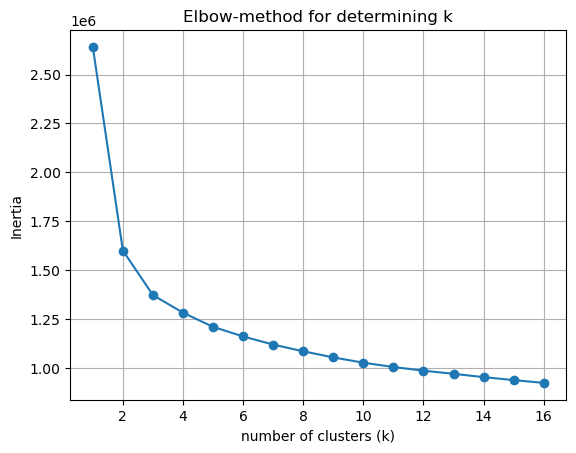

In [17]:
#Elbow-Plot für Clusteranzahl
plt.plot(K, a, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow-method for determining k')
plt.grid(True)
plt.show()

In [18]:
pca = PCA(n_components=15)
RNA_pca_filtered = pca.fit_transform(RNA_filtered)
kmeans_9_RNA_filtered = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_9_RNA_filtered.fit(RNA_filtered)

kmeans_10_RNA_filtered = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_10_RNA_filtered.fit(RNA_filtered)

kmeans_11_RNA_filtered = KMeans(n_clusters=11, random_state=42, n_init=10)
kmeans_11_RNA_filtered.fit(RNA_filtered)

labels_9_RNA_filtered = kmeans_9_RNA_filtered.labels_ + 1
labels_10_RNA_filtered = kmeans_10_RNA_filtered.labels_ + 1
labels_11_RNA_filtered = kmeans_11_RNA_filtered.labels_ + 1

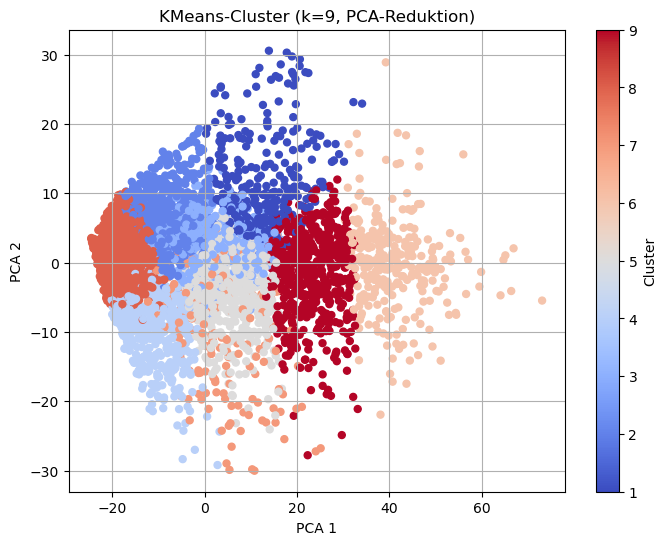

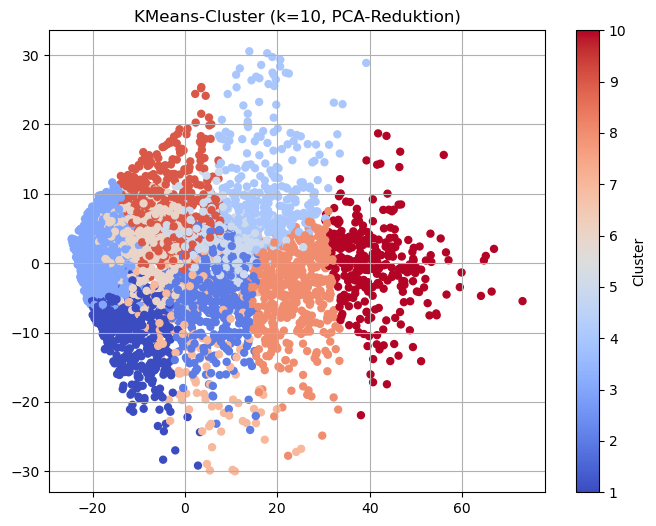

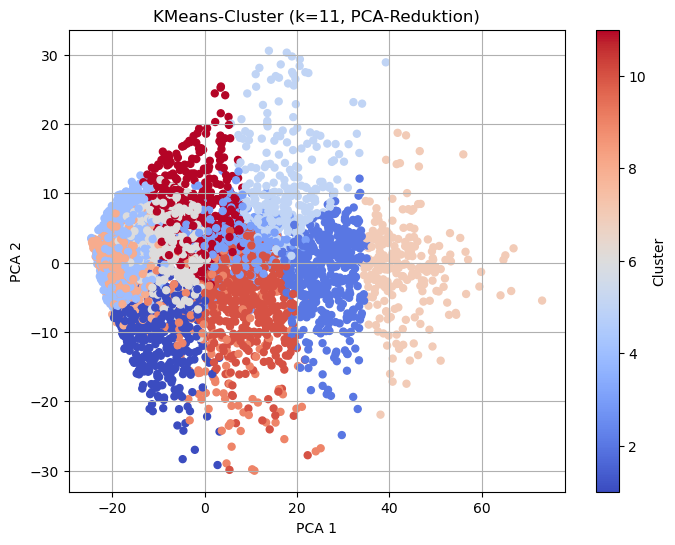

In [19]:
#k=9
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca_filtered[:, 0], RNA_pca_filtered[:, 1], c=labels_9_RNA_filtered, cmap='coolwarm', s=25)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=9, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
#für k=10
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca_filtered[:, 0], RNA_pca_filtered[:, 1], c=labels_10_RNA_filtered, cmap='coolwarm', s=25)
plt.title('KMeans-Cluster (k=10, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.savefig("figures/KMeans_RNA_9.png", dpi=300, bbox_inches="tight")
plt.show()
#k=11
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca_filtered[:, 0], RNA_pca_filtered[:, 1], c=labels_11_RNA_filtered, cmap='coolwarm', s=25)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=11, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Clustering with k=10 looks best.

In [20]:
# adding cluster label to dataset 
RNA_filtered["cluster"] = labels_10_RNA_filtered

### Color palette with lineage_colors

In [21]:
lineages = ([
    "B", "T", "abT", "T.act", "DC", "ILC", "monocyte",
    "myeloid", "gdT", "Stem&Prog", "stroma", "Unassigned"])
palette_colors = sns.color_palette("tab20", n_colors=len(lineages))
lineage_colors = dict(zip(lineages, palette_colors))
lineage_colors["Unassigned"] = "lightgray"

with open("lineage_colors.py", "w") as f:
    f.write("# Farbzuordnung für Lineages (basierend auf tab20)\n")
    f.write("lineage_colors = {\n")
    for key, color in lineage_colors.items():
        if isinstance(color, str):
            f.write(f'    "{key}": "{color}",\n')
        else:
            rgb = ", ".join(f"{c:.6f}" for c in color)
            f.write(f'    "{key}": ({rgb}),\n')
    f.write("}\n")

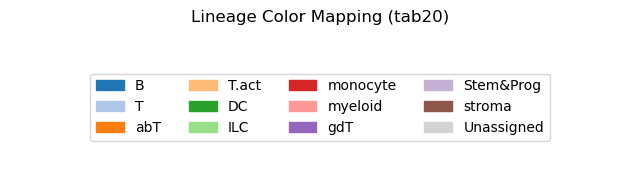

In [22]:
def show_palette(palette):
    handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]
    plt.figure(figsize=(8, 2))
    plt.legend(handles=handles, loc='center', ncol=4)
    plt.axis('off')
    plt.title("Lineage Color Mapping (tab20)")
    plt.show()

show_palette(lineage_colors)

### Celltype_to_lineage

In [23]:
# Load lineage info
qc = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
qc.columns = qc.columns.str.strip()
qc["CellType"] = qc["CellType"].str.strip()
qc["Lineage"] = qc["Lineage"].str.strip()

# Mapping CellType → Lineage
celltype_to_lineage = qc.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# 2. Determine the relationship between the chromatin landscape and gene expression

## i. Does clustering of the gene expression matrix show the same relationships between cell types as the ATAC-seq data?

In [24]:
#load the ATAC dataset: columns = cell types, rows=peaks
ATAC_scaled_ct = pd.read_csv("data/ATAC_scaled.ct.csv", sep=",")
ATAC_scaled_ct.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,-0.347680,-0.332134,-0.312326,-0.392148,-0.212971,-0.399112,-0.398442,-0.233379,-0.350951,-0.396931,...,-0.399737,-0.398901,-0.080700,-0.267259,-0.353273,-0.279969,-0.407153,-0.353697,-0.072970,-0.264709
1,-0.347680,-0.238330,-0.312326,-0.319552,-0.364538,-0.374580,-0.325777,-0.393567,-0.398344,-0.314389,...,-0.236112,-0.398901,-0.263836,-0.358823,-0.394984,-0.315912,-0.314928,-0.188821,-0.169477,-0.312857
2,-0.151497,-0.393661,-0.312326,-0.392148,-0.364538,-0.399112,-0.358528,-0.286775,-0.376708,-0.396931,...,-0.320992,-0.353833,-0.129056,-0.309989,-0.394984,6.098422,0.517198,-0.274888,-0.304379,-0.397884
3,-0.347680,-0.393661,-0.391963,-0.392148,-0.331544,-0.368447,-0.358528,-0.177929,-0.327254,-0.396931,...,-0.364966,-0.221703,-0.341000,-0.395449,-0.312579,0.975992,-0.314928,-0.280073,-0.304379,-0.397884
4,-0.347680,-0.393661,-0.391963,-0.392148,-0.364538,-0.374580,-0.227526,-0.286775,-0.376708,-0.348869,...,-0.364966,-0.398901,-0.341000,-0.224528,-0.354290,-0.315912,-0.339032,-0.274888,-0.245229,0.051840


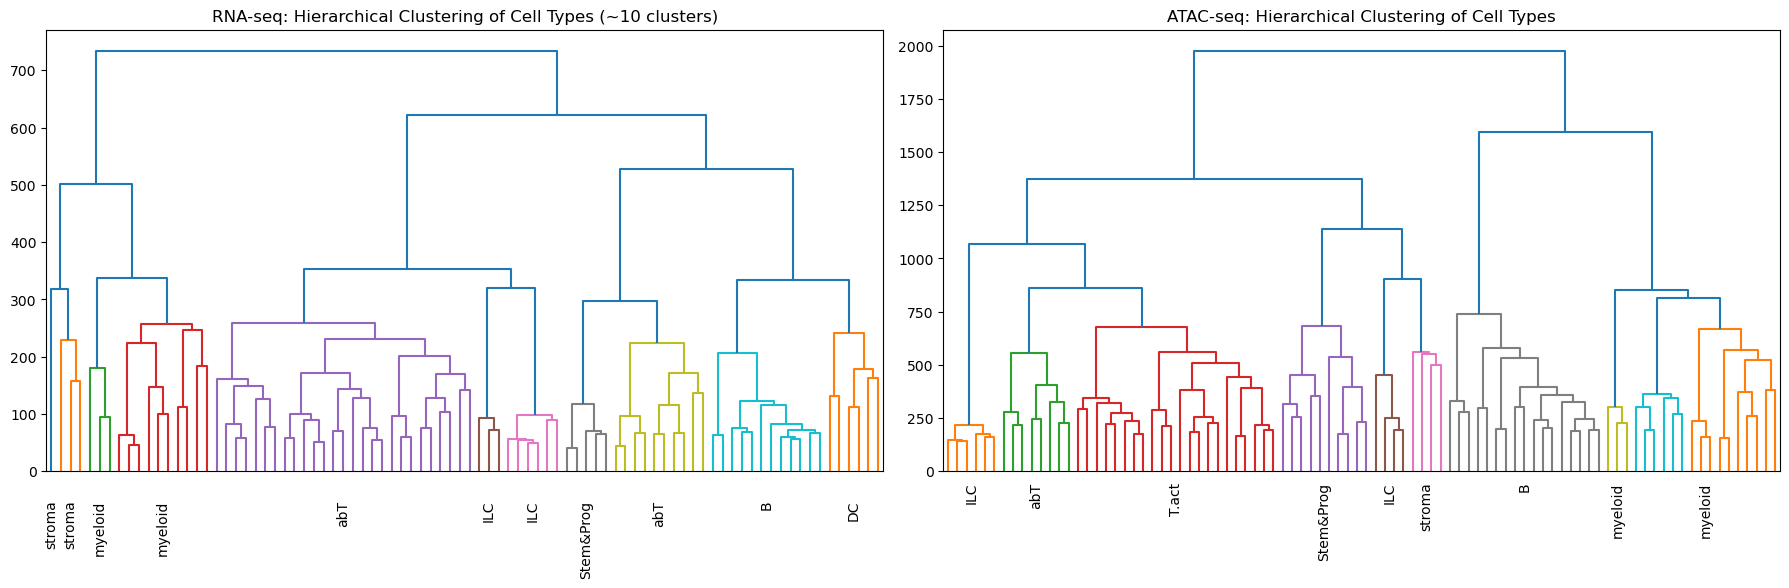

In [25]:
# prepare RNA
rna_by_celltype = RNA_normalized.T  # CellType × Gene
rna_scaled = rna_by_celltype

rna_celltypes = rna_by_celltype.index.tolist()
rna_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in rna_celltypes]

# prepare ATAC
atac_by_celltype = ATAC_scaled_ct.drop(columns="cluster", errors='ignore').T  # CellType × Peak
atac_celltypes = atac_by_celltype.index.tolist()
atac_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in atac_celltypes]

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# RNA
linkage_rna = sch.linkage(pdist(rna_scaled), method="ward")
num_clusters_rna = 10
threshold_rna = linkage_rna[-num_clusters_rna + 1, 2] * 0.85

# CellType labels
dendro_rna = sch.dendrogram(linkage_rna,
                            labels=rna_celltypes,
                            leaf_rotation=90,
                            leaf_font_size=9,
                            ax=axs[0],
                            color_threshold=threshold_rna)

axs[0].set_title(f"RNA-seq: Hierarchical Clustering of Cell Types (~{num_clusters_rna} clusters)")

# connection to clusters
cluster_ids_rna = fcluster(linkage_rna, t=threshold_rna, criterion='distance')
ct_to_cluster_rna = dict(zip(rna_celltypes, cluster_ids_rna))

# new linkage
ordered_ct_rna = dendro_rna["ivl"]
xticks_rna = axs[0].get_xticks()
ct_clusters = [ct_to_cluster_rna[ct] for ct in ordered_ct_rna]
ct_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in ordered_ct_rna]

# lineage in the middle of the cluster
cluster_pos_rna = defaultdict(list)
cluster_lin_rna = defaultdict(list)
for i, (c, l) in enumerate(zip(ct_clusters, ct_lineages)):
    cluster_pos_rna[c].append(xticks_rna[i])
    cluster_lin_rna[c].append(l)

for cluster_id in sorted(cluster_pos_rna):
    xpos = np.mean(cluster_pos_rna[cluster_id])
    lineage = Counter(cluster_lin_rna[cluster_id]).most_common(1)[0][0]
    axs[0].text(xpos, -50, lineage, ha='center', va='top', fontsize=10, rotation=90)

axs[0].set_xticklabels(["" for _ in ordered_ct_rna])


# ATAC
linkage_atac = sch.linkage(pdist(atac_by_celltype), method="ward")
num_clusters_atac = 10
threshold_atac = linkage_atac[-num_clusters_atac + 1, 2] * 1

dendro_atac = sch.dendrogram(linkage_atac,
                             labels=atac_celltypes,
                             leaf_rotation=90,
                             leaf_font_size=9,
                             ax=axs[1],
                             color_threshold=threshold_atac)

axs[1].set_title("ATAC-seq: Hierarchical Clustering of Cell Types")

# cluster
cluster_ids_atac = fcluster(linkage_atac, t=threshold_atac, criterion='distance')
ct_to_cluster_atac = dict(zip(atac_celltypes, cluster_ids_atac))

# new linkage
ordered_ct_atac = dendro_atac["ivl"]
xticks_atac = axs[1].get_xticks()
ct_clusters_atac = [ct_to_cluster_atac[ct] for ct in ordered_ct_atac]
ct_lineages_atac = [celltype_to_lineage.get(ct, "Unassigned") for ct in ordered_ct_atac]

# lineage in the middle of the cluster
cluster_pos_atac = defaultdict(list)
cluster_lin_atac = defaultdict(list)
for i, (c, l) in enumerate(zip(ct_clusters_atac, ct_lineages_atac)):
    cluster_pos_atac[c].append(xticks_atac[i])
    cluster_lin_atac[c].append(l)

for cluster_id in sorted(cluster_pos_atac):
    xpos = np.mean(cluster_pos_atac[cluster_id])
    lineage = Counter(cluster_lin_atac[cluster_id]).most_common(1)[0][0]
    axs[1].text(xpos, -50, lineage, ha='center', va='top', fontsize=10, rotation=90)

axs[1].set_xticklabels(["" for _ in ordered_ct_atac])

plt.tight_layout()
plt.savefig("figures/dendrogram_RNA_ATAC_10_clusters.png", dpi=300, bbox_inches="tight")
plt.show()

Adjusted Rand Index: 0.680
Fowlkes-Mallows Index: 0.726
Cophenetic distance correlation: r = 0.073, p = 0.0000


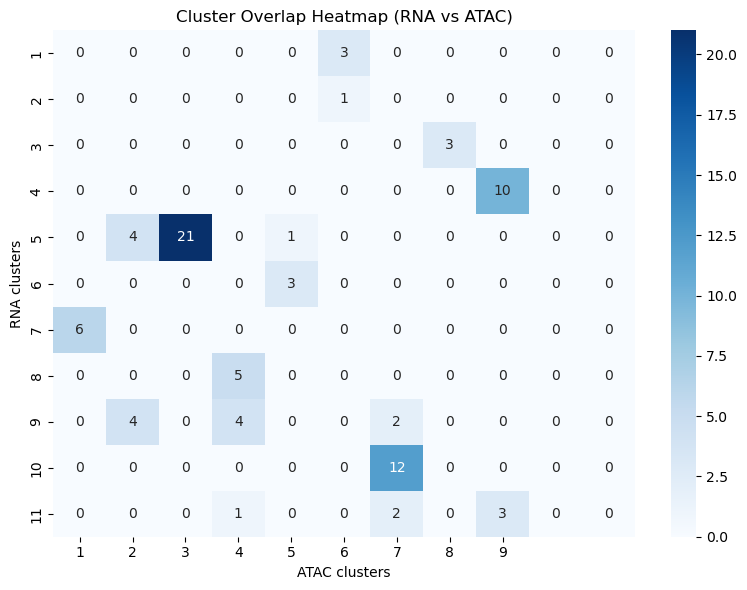

In [26]:
# common cell types from both RNA and ATAC
common_celltypes = sorted(set(rna_celltypes) & set(atac_celltypes))

# assigning cluster IDs for common cell types
rna_cluster_labels = np.array([ct_to_cluster_rna[ct] for ct in common_celltypes])
atac_cluster_labels = np.array([ct_to_cluster_atac[ct] for ct in common_celltypes])

# Adjusted Rand Index
ari = adjusted_rand_score(rna_cluster_labels, atac_cluster_labels)
print(f"Adjusted Rand Index: {ari:.3f}")

# Fowlkes-Mallows Index
fmi = fowlkes_mallows_score(rna_cluster_labels, atac_cluster_labels)
print(f"Fowlkes-Mallows Index: {fmi:.3f}")

# Cophenetic distance correlation
coph_rna, coph_distances_rna = cophenet(linkage_rna, pdist(rna_scaled))
coph_atac, coph_distances_atac = cophenet(linkage_atac, pdist(atac_by_celltype))

# matching array lengths for correlation
min_len = min(len(coph_distances_rna), len(coph_distances_atac))
cophenetic_corr, pval = pearsonr(coph_distances_rna[:min_len], coph_distances_atac[:min_len])
print(f"Cophenetic distance correlation: r = {cophenetic_corr:.3f}, p = {pval:.4f}")

# sorted unique cluster IDs
rna_cluster_ids = sorted(set(rna_cluster_labels))
atac_cluster_ids = sorted(set(atac_cluster_labels))

# confusion matrix with fixed order
conf_mat = confusion_matrix(rna_cluster_labels, atac_cluster_labels, labels=rna_cluster_ids if rna_cluster_ids == atac_cluster_ids else None)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=atac_cluster_ids, yticklabels=rna_cluster_ids)
plt.xlabel("ATAC clusters")
plt.ylabel("RNA clusters")
plt.title("Cluster Overlap Heatmap (RNA vs ATAC)")
plt.tight_layout()
plt.savefig("figures/Cluster_Overlap_Heatmap_RNA_ATAC", dpi=300, bbox_inches='tight')
plt.show()

##  ii. Can one use correlation analysis and distance information to associate ATAC-seq regions with gene expression?

###  a) Where are associated CREs located with respect to the TSS? 

Median distance (p < 0.05): 19.28 kb
Median distance (systematic set): 22.5 kb


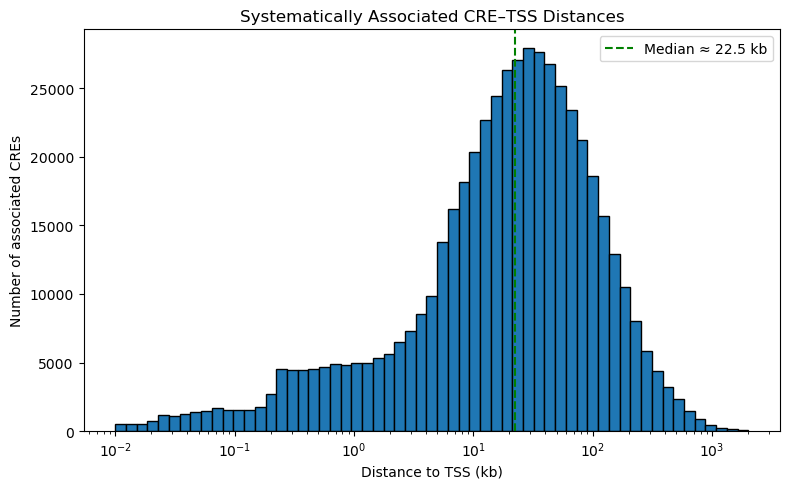

In [27]:
peaks = ATAC.copy()
peaks.columns = peaks.columns.str.strip()

# 'genes.within.100Kb' in numeric, filtering, is a boolean 
peaks['genes.within.100Kb']      = pd.to_numeric(peaks['genes.within.100Kb'],      errors='coerce')
peaks['Included.in.systematic.analysis'] = peaks['Included.in.systematic.analysis'].astype(bool)


TCSE = pd.read_csv('data/Transcript, Coding, and Exon Start and End Positions.CSV', sep=';')
tx = TCSE.copy()
tx.columns = tx.columns.str.strip()

# calculating the TSS
tx['TSS'] = np.where(
    tx['Strand'] == '+',
    tx["5' transcript Start"],
    tx["3' Transcript Start"]
)

# mapping Chromosomes to TSS positions
tss_by_chr = tx.groupby('Chromosome')['TSS'].apply(np.array).to_dict()

# helper for distance to nearest TSS
def dist_to_tss(r):
     if r['chrom'] not in tss_by_chr: return np.nan
     return np.min(np.abs(tss_by_chr[r['chrom']] - r['Summit']))/1000
peaks['distance_kb'] = peaks.apply(dist_to_tss, axis=1)

# choosing only peaks with strong association p
assoc_strict = peaks[peaks['_-log10_bestPvalue'] > 1.3].copy()

# compute median
median_strict = assoc_strict['distance_kb'].median()
print(f"Median distance (p < 0.05): {median_strict:.2f} kb")

sys = peaks[peaks['Included.in.systematic.analysis']]

# recompute median with systematic analysis subset
median_sys = sys['distance_kb'].median()
print(f"Median distance (systematic set): {median_sys:.1f} kb")


plt.figure(figsize=(8, 5))
data = sys['distance_kb'].dropna()
bins = np.logspace(-2, np.log10(data.max()), 60)
plt.hist(data, bins=bins, edgecolor='black')
plt.xscale('log')
plt.axvline(median_sys, color='green', linestyle='--',
            label=f'Median ≈ {median_sys:.1f} kb')

plt.xlabel('Distance to TSS (kb)')
plt.ylabel('Number of associated CREs')
plt.title('Systematically Associated CRE–TSS Distances')
plt.legend()
plt.tight_layout()
plt.savefig("figures/Systematically Associated CRE-TSS distance.png", dpi=300, bbox_inches="tight")
plt.show()


### b) Where are the most associated CREs located? 

Feature	Count	Percentage
Promoter  	 44149	  8.61%
Exon      	 48258	  9.41%
Intron    	214383	 41.82%
Intergenic	205805	 40.15%


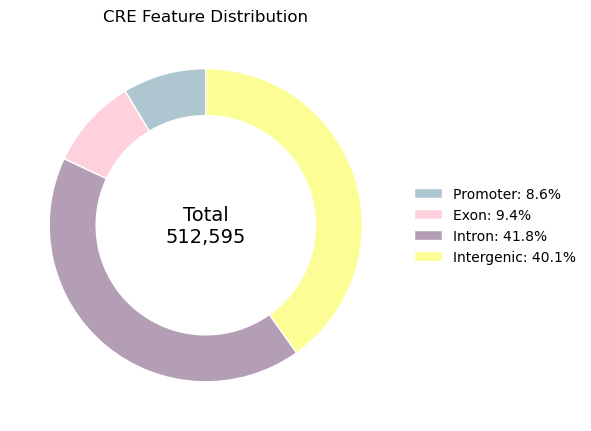

In [33]:
Bcells = pd.read_csv("data/ATAC_Bcells.csv")
peaks = Bcells.copy()  

peaks = peaks.rename(columns={"chrom": "Chromosome", "Summit": "Position"})

# ±250 bp window 
peaks["Start"]      = (peaks["Position"] - 250).astype("int64")
peaks["End"]        = (peaks["Position"] + 250).astype("int64")


peaks["Chromosome"] = peaks["Chromosome"].astype(str)
peaks["ID"]         = range(len(peaks))

# Conver to PyRanges
cre_pr = pr.PyRanges(peaks[["Chromosome", "Start", "End", "ID"]])

TCSE = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";", engine="python"
)
tx = TCSE.copy()

# Calculating transcript span per row
tx["tx_start"] = tx[["5' transcript Start","3' Transcript Start "]].min(axis=1).astype("int64")
tx["tx_end"]   = tx[["5' transcript Start","3' Transcript Start "]].max(axis=1).astype("int64")

transcript_df = pd.DataFrame({
    "Chromosome": tx["Chromosome"].astype(str),
    "Start":      tx["tx_start"],
    "End":        tx["tx_end"]
})

# Convert to PyRanges
tx_pr = pr.PyRanges(transcript_df)

tx["TSS"] = tx["5' transcript Start"].astype("int64")

# defining promotor  
prom_df = pd.DataFrame({
    "Chromosome": tx["Chromosome"].astype(str),
    "Start":      tx["TSS"] - 1000,
    "End":        tx["TSS"] + 1000
})
prom_df[["Start","End"]] = prom_df[["Start","End"]].astype("int64")

# Convert to PyRanges 
promoters = pr.PyRanges(prom_df)

# exon starts/ends in a row
exon_rows = []
for _, r in tx.iterrows():
    starts = [int(x) for x in r["Exon Starts "].rstrip(",").split(",")]
    ends   = [int(x) for x in r["Exon Ends"].rstrip(",").split(",")]
    for s, e in zip(starts, ends):
        exon_rows.append({
            "Chromosome": str(r["Chromosome"]),
            "Start":      int(s),
            "End":        int(e)
        })

exon_df = pd.DataFrame(exon_rows)
exon_df[["Start","End"]] = exon_df[["Start","End"]].astype("int64")

# convert in PyRanges
exons = pr.PyRanges(exon_df)

# Classify each CRE by priority: promoter > exon > intron > intergenic 
prom_ids   = set(cre_pr.join(promoters).ID)
exon_ids   = set(cre_pr.join(exons).ID) - prom_ids
tx_ids     = set(cre_pr.join(tx_pr).ID)
intron_ids = tx_ids - prom_ids - exon_ids
all_ids    = set(peaks["ID"])
inter_ids  = all_ids - prom_ids - exon_ids - intron_ids

counts = {
    "Promoter":   len(prom_ids),
    "Exon":       len(exon_ids),
    "Intron":     len(intron_ids),
    "Intergenic": len(inter_ids)
}

# table: summary
total = len(peaks)
print("Feature\tCount\tPercentage")
for feat, cnt in counts.items():
    pct = (cnt / total * 100) if total else 0
    print(f"{feat:10s}\t{cnt:6d}\t{pct:6.2f}%")

categories = ["Promoter", "Exon", "Intron", "Intergenic"]
sizes = [44149, 48258, 214383, 205805]  # number of CREs per class
total = sum(sizes)

percentages = [s / total * 100 for s in sizes]

colors = ["#AEC6CF", "#FFD1DC", "#B39EB5", "#FDFD96"]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, _ = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='white')
)
ax.text(0, 0, f"Total\n{total:,}", ha='center', va='center', fontsize=14)

legend_labels = [
    f"{cat}: {perc:.1f}%"
    for cat, perc in zip(categories, percentages)
]
ax.legend(
    wedges,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
ax.set_aspect('equal')
ax.set_title("CRE Feature Distribution")
plt.tight_layout()
plt.savefig("figures/CRE Feature Distribution.png", dpi=300, bbox_inches="tight")
plt.show()


### c) How many CREs are associated with genes? 

309108 / 512595 = 60.3% gene-associated CREs


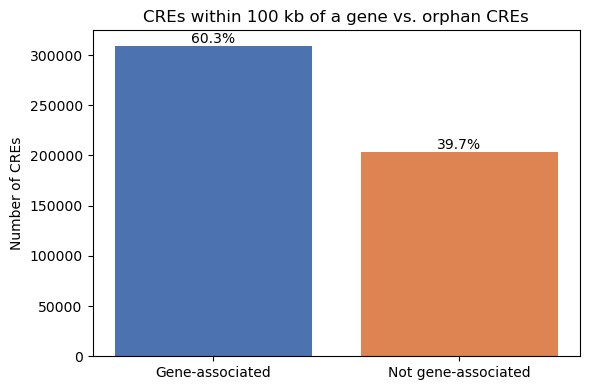

In [34]:
Bcells = pd.read_csv("data/ATAC_Bcells.csv")
peaks_df = Bcells.copy()
peaks_df.columns = [c.strip() for c in peaks_df.columns]

# Helper to count genes per entry
def count_genes(entry):
    if pd.isna(entry) or entry == '':
        return 0
    s = str(entry)
    if ',' in s:
        return sum(1 for g in s.split(',') if g.strip())
    try:
        return int(s)
    except ValueError:
        return 0

peaks_df['gene_count'] = peaks_df['genes.within.100Kb'].apply(count_genes)

# Computing totals and percentage
total_peaks      = len(peaks_df)
associated_peaks = (peaks_df['gene_count'] > 0).sum()
pct              = associated_peaks / total_peaks * 100

print(f"{associated_peaks} / {total_peaks} = {pct:.1f}% gene-associated CREs")

total     = len(peaks_df)
associated = (peaks_df['gene_count'] > 0).sum()
not_assoc  = total - associated

labels = ['Gene-associated', 'Not gene-associated']
counts = [associated, not_assoc]


fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(labels, counts, color=['#4c72b0', '#dd8452'])

for bar, count in zip(bars, counts):
    pct = count / total * 100
    ax.text(
        bar.get_x() + bar.get_width()/2,  
        bar.get_height(),                  
        f'{pct:.1f}%',                     
        ha='center',                       
        va='bottom'                        
    )

ax.set_ylabel('Number of CREs')
ax.set_title('CREs within 100 kb of a gene vs. orphan CREs')
plt.tight_layout()
plt.savefig("figures/CREs within 100 kb of a gene vs. orphan CREs.png", dpi=300, bbox_inches="tight")
plt.show()



### d) Is every promoter associated with a gene? 

In [35]:
TCSE = pd.read_csv("data/Transcript, Coding, and Exon Start and End Positions.CSV", sep=";", engine="python")
tx = TCSE.copy()
tx = tx.rename(columns={
    'Gene Name':         'gene_name',
    'Transcript Name':   'transcript_name',
    'Chromosome':        'chrom',
    'Strand':            'strand',
    "5' transcript Start":  'tx_start',
    "3' Transcript Start ": 'tx_end',
    'Exon Count':        'exon_count',
    'Exon Starts ':      'exon_starts',
    'Exon Ends':         'exon_ends'
})

# transcript’s exon lists: one row per exon
def parse_exons(row):
    starts = row['exon_starts'].strip(' ,').split(',')
    ends   = row['exon_ends'].strip(' ,').split(',')
    for s, e in zip(starts, ends):
        yield {
            'Chromosome': row['chrom'],
            'Start':      int(s),
            'End':        int(e),
            'gene_name':  row['gene_name']
        }

exon_records = []
for _, row in tx.iterrows():
    exon_records.extend(parse_exons(row))
exons_df = pd.DataFrame(exon_records)

# Computing TSS 
tx['tss'] = tx.apply(lambda r: r['tx_start'] if r['strand'] == '+' else r['tx_end'], axis=1)

# Defining the promotors
promoters_df = (
    pd.DataFrame({
        'Chromosome': tx['chrom'],
        'Start':      (tx['tss'] - 1000).clip(lower=0),
        'End':        tx['tss'] + 1000,
        'gene_name':  tx['gene_name']
    })
    .drop_duplicates()
)

# merging exon intervals
def merge_intervals(ints):
    """ints = list of (start,end); returns merged list."""
    ints = sorted(ints, key=lambda x: x[0])
    merged = []
    for s, e in ints:
        if not merged or s > merged[-1][1]:
            merged.append([s, e])
        else:
            merged[-1][1] = max(merged[-1][1], e)
    return merged

gene_bodies_records = []
for gene, grp in exons_df.groupby('gene_name'):
    intervals = list(zip(grp['Start'], grp['End']))
    for s, e in merge_intervals(intervals):
        gene_bodies_records.append({
            'Chromosome': grp['Chromosome'].iat[0],
            'Start':      s,
            'End':        e,
            'gene_name':  gene
        })

gene_bodies_df = pd.DataFrame(gene_bodies_records)

# Testing overlap with PyRanges
gr_prom      = pr.PyRanges(promoters_df)
gr_genebody  = pr.PyRanges(gene_bodies_df)
overlap = gr_prom.join(gr_genebody)
with_gene = set(overlap.df[['Chromosome','Start','End']]
                .itertuples(index=False, name=None))
all_prom  = set(gr_prom.df[['Chromosome','Start','End']]
                .itertuples(index=False, name=None))
orphan     = all_prom - with_gene


print(f"Total promoters:               {len(all_prom)}")
print(f"Promoters without gene overlap: {len(orphan)}")
if orphan:
    print("Examples of orphan promoters:")
    for chrom, start, end in list(orphan)[:10]:
        print(f"  {chrom}:{start}-{end}")
else:
    print("Every promoter overlaps at least one gene body.")


Total promoters:               32241
Promoters without gene overlap: 63
Examples of orphan promoters:
  chr10:129664754-129666754
  chr5_JH584299_random:828033-830033
  chr4_JH584294_random:81688-83688
  chr5:95509741-95511741
  chr4:42317271-42319271
  chr5:77271756-77273756
  chr5_GL456354_random:4184-6184
  chr4:42551477-42553477
  chr7:5804445-5806445
  chr1:85273635-85275635


### e) Are some promoters associated with other genes? 

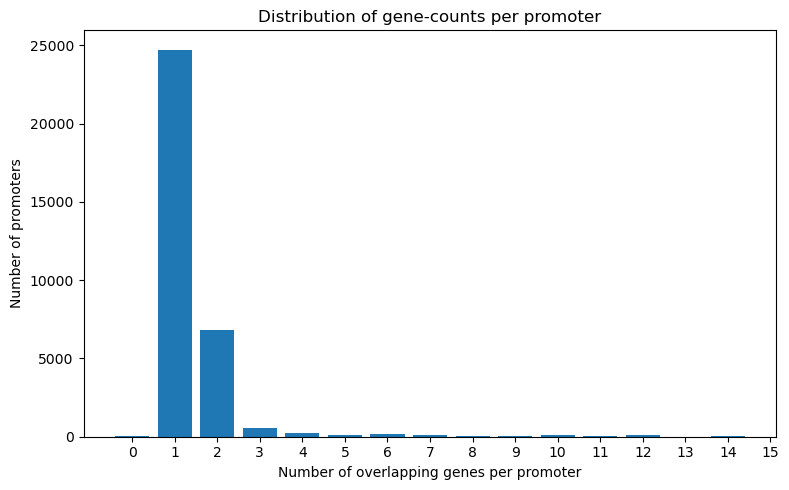

In [36]:
TCSE = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";",
    engine="python"
)
tx = TCSE.copy()
tx = tx.rename(columns={
    'Gene Name':            'gene_name',
    'Transcript Name':      'transcript_name',
    'Chromosome':           'chrom',
    'Strand':               'strand',
    "5' transcript Start":  'tx_start',
    "3' Transcript Start ": 'tx_end',
    'Exon Count':           'exon_count',
    'Exon Starts ':         'exon_starts',
    'Exon Ends':            'exon_ends'
})

# transcript’s exon lists: one row per exon
def parse_exons(row):
    starts = row['exon_starts'].strip(' ,').split(',')
    ends   = row['exon_ends'].strip(' ,').split(',')
    for s, e in zip(starts, ends):
        yield {
            'Chromosome': row['chrom'],
            'Start':      int(s),
            'End':        int(e),
            'gene_name':  row['gene_name']
        }

exon_records = []
for _, row in tx.iterrows():
    exon_records.extend(parse_exons(row))
exons_df = pd.DataFrame(exon_records)

# Computing TSS
tx['tss'] = tx.apply(
    lambda r: r['tx_start'] if r['strand'] == '+' else r['tx_end'],
    axis=1
)

# Defining promotor
promoters_df = (
    pd.DataFrame({
        'Chromosome': tx['chrom'],
        'Start':      (tx['tss'] - 1000).clip(lower=0),
        'End':        tx['tss'] + 1000,
        'gene_name':  tx['gene_name']
    })
    .drop_duplicates()
)

# Merging exons per gene
def merge_intervals(ints):
    ints = sorted(ints, key=lambda x: x[0])
    merged = []
    for s, e in ints:
        if not merged or s > merged[-1][1]:
            merged.append([s, e])
        else:
            merged[-1][1] = max(merged[-1][1], e)
    return merged

gene_bodies_records = []
for gene, grp in exons_df.groupby('gene_name'):
    intervals = list(zip(grp['Start'], grp['End']))
    for s, e in merge_intervals(intervals):
        gene_bodies_records.append({
            'Chromosome': grp['Chromosome'].iat[0],
            'Start':      s,
            'End':        e,
            'gene_name':  gene
        })
gene_bodies_df = pd.DataFrame(gene_bodies_records)

# Using PyRanges to for overlaps, counting them 
promoters_df = promoters_df.reset_index().rename(columns={'index':'promoter_id'})
gr_prom      = pr.PyRanges(promoters_df)
gr_genebody  = pr.PyRanges(gene_bodies_df)
overlap = gr_prom.join(gr_genebody, suffix="_b")

ov = overlap.df[['promoter_id','gene_name_b']]
prom_counts = (
    ov
    .groupby('promoter_id')['gene_name_b']
    .nunique()
    .reset_index(name='n_genes')
)

pc_df = promoters_df.merge(prom_counts, on='promoter_id', how='left')
pc_df['n_genes'] = pc_df['n_genes'].fillna(0).astype(int)

max_g = pc_df['n_genes'].max()
bins  = range(0, max_g + 2)  # include zero, then 1…max_g

plt.figure(figsize=(8,5))
plt.hist(
    pc_df['n_genes'],
    bins=bins,
    align='left',
    rwidth=0.8
)
plt.xlabel('Number of overlapping genes per promoter')
plt.ylabel('Number of promoters')
plt.title('Distribution of gene‐counts per promoter')
plt.xticks(bins)
plt.tight_layout()
plt.savefig("figures/Distribution of gene‐counts per promoter.png", dpi=300, bbox_inches="tight")
plt.show()


### f) Are there CREs that control several genes? 

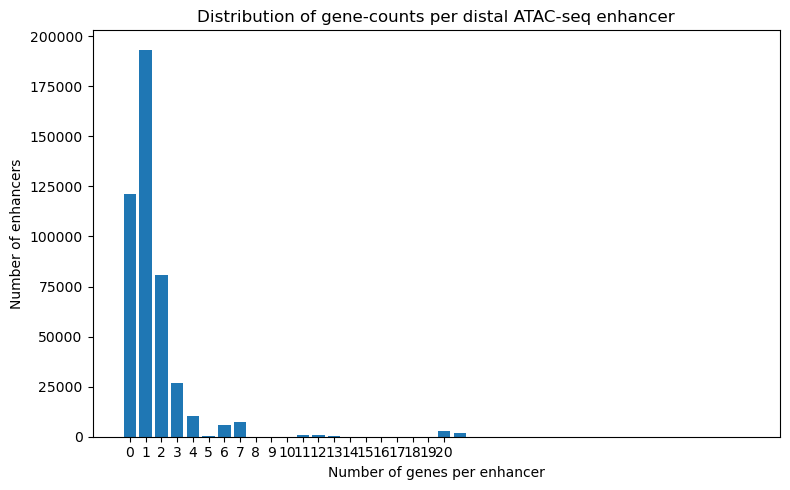

In [37]:

TCSE = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";", engine="python"
)
tx = TCSE.copy()
tx = tx.rename(columns={
    'Gene Name':'gene_name',
    'Chromosome':'chrom',
    'Strand':'strand',
    "5' transcript Start":'tx_start',
    "3' Transcript Start ":'tx_end',
    'Exon Starts ':'exon_starts','Exon Ends':'exon_ends'
})
tx['chrom'] = tx['chrom'].astype(str).str.replace('chr','',regex=False).str.upper()

# one row per exon
def parse_exons(r):
    starts = r.exon_starts.strip(' ,').split(',')
    ends   = r.exon_ends.strip(' ,').split(',')
    for s,e in zip(starts, ends):
        yield {
            'Chromosome': r.chrom,
            'Start':      int(s),
            'End':        int(e),
            'gene_name':  r.gene_name
        }

exons_df = pd.DataFrame([rec
    for _,r in tx.iterrows()
    for rec in parse_exons(r)
])

# Defining gene bodes as full span of gene
gene_bodies_df = (
    exons_df
      .groupby('gene_name')
      .agg(Chromosome=('Chromosome','first'),
           Start      =('Start','min'),
           End        =('End','max'))
      .reset_index()
)

# Computing TSS
tx['tss'] = tx.apply(lambda r: r.tx_start if r.strand=='+' else r.tx_end, axis=1)
promoters_df = (
    pd.DataFrame({
        'Chromosome': tx.chrom,
        'Start':      (tx.tss-1000).clip(lower=0).astype(int),
        'End':        (tx.tss+1000).astype(int),
        'gene_name':  tx.gene_name
    })
    .drop_duplicates()
    .reset_index().rename(columns={'index':'promoter_id'})
)

# Defining enhancer
peaks_df = ATAC.copy()
peaks_df = (
    peaks_df[
        ["ImmGenATAC1219.peakID", "chrom", "Summit"]
    ]
    .rename(
        columns={
            "ImmGenATAC1219.peakID": "enh_id",
            "chrom":                  "Chromosome",
            "Summit":                 "Start"
        }
    )
)
peaks_df['Chromosome'] = (
    peaks_df['Chromosome']
      .astype(str)
      .str.replace('chr','',regex=False)
      .str.upper()
)
peaks_df['Start'] = peaks_df['Start'].astype(int) - 250
peaks_df['End']   = peaks_df['Start'] + 500

for df in (gene_bodies_df, promoters_df, peaks_df):
    df['Start'] = df['Start'].astype(np.int32)
    df['End']   = df['End'].astype(np.int32)

# Defineing distal enhancers (anti-joining against promotors)

gr_peaks = pr.PyRanges(peaks_df)
gr_prom  = pr.PyRanges(promoters_df)

# find peaks overlapping promoters
hit_prom = gr_peaks.join(gr_prom).df['enh_id'].unique()
enhancers_df = peaks_df.loc[~peaks_df.enh_id.isin(hit_prom)].copy()

# Joining enhancer to gene bodies, counting genes
gr_enh = pr.PyRanges(enhancers_df)
gr_gb  = pr.PyRanges(gene_bodies_df)

ov = gr_enh.join(gr_gb, suffix="_gene").df[['enh_id','gene_name']].drop_duplicates()
enh_counts = (
    ov.groupby('enh_id')['gene_name']
      .nunique()
      .reset_index(name='n_genes')
)

enhancers_df = (
    enhancers_df[['enh_id','Chromosome','Start','End']]
      .merge(enh_counts, on='enh_id', how='left')
      .fillna({'n_genes':0})
)
enhancers_df['n_genes'] = enhancers_df['n_genes'].astype(int)

plt.figure(figsize=(8,5))
plt.hist(
    enhancers_df['n_genes'],
    bins=range(enhancers_df['n_genes'].max()+2),
    align='left', rwidth=0.8
)
plt.xlabel('Number of genes per enhancer')
plt.ylabel('Number of enhancers')
plt.title('Distribution of gene‐counts per distal ATAC‐seq enhancer')
plt.xticks(range(min(enhancers_df['n_genes'].max(),20)+1))
plt.tight_layout()
plt.savefig("figures/Distribution of gene‐counts per distal ATAC‐seq enhancer.png", dpi=300, bbox_inches="tight")
plt.show()


## iii. Can one use regression to associate CREs with gene expression?

### a) How much of the variance of gene expression can be explained for each gene with this approach?

In [38]:
ATAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

In [39]:
RNA_normalized.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0.467905,0.467905,0.440325,0.440348,0.506914,0.549382,0.572034,0.710436,0.441801,1.125574,...,0.441889,0.441886,0.523080,0.486204,0.441353,0.439541,0.438883,0.439338,0.438882,0.441420
1,6.189365,6.442399,6.092043,6.177199,6.072231,6.217686,5.999018,5.618970,5.635627,5.624330,...,5.442445,5.237761,5.192772,5.962257,6.628704,6.148549,6.203904,4.997346,5.525697,5.647654
2,4.824831,4.834842,4.646641,4.791492,5.250104,4.811090,4.633956,4.391826,4.381290,3.919820,...,4.999386,4.736176,4.647383,4.475258,4.376049,5.172713,3.812979,4.744689,4.805477,4.927304
3,1.998589,2.779345,2.682207,2.790755,2.231756,2.009600,1.003917,2.045323,2.364143,2.774393,...,1.651977,2.046987,1.278197,2.375015,1.568406,1.308451,0.822322,0.594568,0.900844,0.441151
4,5.904718,5.811605,5.793696,6.045780,5.852831,5.758250,5.857145,5.570086,4.989296,4.978950,...,5.203319,5.711665,5.546392,5.269271,4.993648,5.178032,4.963241,6.098531,6.052993,4.077339


In [40]:
RNA_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64
 15  B.

In [41]:
# celltype coloumns
common_celltypes = RNA_normalized.columns.intersection(ATAC.columns)

# prep ATAC
atac_means = ATAC[common_celltypes].mean().reset_index()
atac_means.columns = ['CellType', 'ATAC_mean']

# prep RNA
rna_means = RNA_normalized[common_celltypes].mean().reset_index()
rna_means.columns = ['CellType', 'RNA_mean']

combined = pd.merge(atac_means, rna_means, on='CellType')


Regression over all celltypes: statsmodels and sklearn

In [42]:
import statsmodels.api as sm 
X = sm.add_constant(combined['ATAC_mean']) 
y = combined['RNA_mean']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               RNA_mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3252
Date:                Mon, 07 Jul 2025   Prob (F-statistic):              0.570
Time:                        22:55:25   Log-Likelihood:                 241.02
No. Observations:                  85   AIC:                            -478.0
Df Residuals:                      83   BIC:                            -473.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2675      0.205     15.962      0.0

In [43]:
X = combined['ATAC_mean'].values.reshape(-1, 1)
y = combined['RNA_mean'].values

model = LinearRegression()
model.fit(X, y)

r2 = r2_score(y, model.predict(X))
print(f"R²: {r2:.3f}")


R²: 0.004


regression per celltype

In [44]:
# group ATAC peaks per gens
atac_genes = ATAC.dropna(subset=['genes.within.100Kb']).copy()

atac_genes['Gene'] = atac_genes['genes.within.100Kb'].str.split(',')
atac_genes = atac_genes.explode('Gene')

atac_genes['Gene'] = atac_genes['Gene'].str.upper().str.strip()


In [45]:
atac_genes.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,Gene
16,ImmGenATAC1219.peak_17,chr1,3600878,0.09,0.36,NaN,NaN,Xkr4,0.41,0.71,...,0.10,0.59,0.53,1.39,1.10,1.52,0.52,1.23,1.03,XKR4
17,ImmGenATAC1219.peak_18,chr1,3611363,0.16,3.32,1.0,NaN,Xkr4,0.41,0.10,...,0.54,0.23,0.11,0.52,5.29,0.75,1.12,3.46,13.24,XKR4
18,ImmGenATAC1219.peak_19,chr1,3670859,0.76,1.74,1.0,NaN,Xkr4,0.41,2.57,...,1.75,2.88,0.53,0.11,2.49,3.49,2.21,4.30,5.61,XKR4
19,ImmGenATAC1219.peak_20,chr1,3671114,0.94,2.02,1.0,NaN,Xkr4,0.41,6.07,...,2.11,1.89,1.39,0.11,4.97,2.00,3.72,2.29,12.25,XKR4
20,ImmGenATAC1219.peak_21,chr1,3671437,0.72,2.02,1.0,Xkr4,Xkr4,0.41,3.68,...,0.10,0.11,1.87,0.92,4.97,2.62,2.64,2.83,17.14,XKR4


In [46]:
atac_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511829 entries, 16 to 512594
Data columns (total 99 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ImmGenATAC1219.peakID            1511829 non-null  object 
 1   chrom                            1511829 non-null  object 
 2   Summit                           1511829 non-null  int64  
 3   mm10.60way.phastCons_scores      1511829 non-null  float64
 4   _-log10_bestPvalue               1511829 non-null  float64
 5   Included.in.systematic.analysis  1057704 non-null  float64
 6   TSS                              78405 non-null    object 
 7   genes.within.100Kb               1511829 non-null  object 
 8   LTHSC.34-.BM                     1511829 non-null  float64
 9   LTHSC.34+.BM                     1511829 non-null  float64
 10  STHSC.150-.BM                    1511829 non-null  float64
 11  MPP4.135+.BM                     1511829 non-null  floa

In [47]:
# mean ATAC peak per gene

ATAC_reg = atac_genes.groupby('Gene')[common_celltypes].mean()
ATAC_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13RIK,4.505625,5.851771,5.916042,4.556563,4.213125,4.846563,5.157604,5.401562,4.343646,4.896458,...,5.695938,5.549271,8.314063,7.085313,4.580625,6.268958,8.485625,6.464062,6.007396,10.448750
0610007P14RIK,2.606087,2.040652,2.899565,2.081739,1.883261,1.685000,1.797609,1.793478,1.585217,1.726739,...,2.244348,2.192391,2.001522,3.311304,1.487174,4.932826,3.109348,3.079130,3.157391,3.210652
0610009B22RIK,7.186849,8.043151,8.228356,7.145479,7.872740,7.577397,7.217397,10.161644,7.342740,9.571918,...,8.213562,7.690548,9.198493,8.962055,9.307945,4.850274,8.796849,8.016027,4.177123,9.362603
0610009L18RIK,3.792022,4.991798,6.292135,4.735618,4.871685,4.712921,4.434719,5.617528,4.269101,4.554944,...,6.837416,7.476292,6.638539,6.899551,6.905393,5.024157,8.432360,6.032697,2.760899,6.832584
0610009O20RIK,5.041613,5.535161,6.753333,5.882043,5.752366,5.921828,5.691183,6.118710,5.707097,5.277849,...,6.686882,6.231505,7.795269,7.248387,5.407957,7.187097,6.746559,7.950430,5.402473,7.797527


In [48]:
ATAC_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23871 entries, 0610005C13RIK to ZZZ3
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           23871 non-null  float64
 1   LTHSC.34+.BM           23871 non-null  float64
 2   STHSC.150-.BM          23871 non-null  float64
 3   MPP4.135+.BM           23871 non-null  float64
 4   proB.CLP.BM            23871 non-null  float64
 5   proB.FrA.BM            23871 non-null  float64
 6   proB.FrBC.BM           23871 non-null  float64
 7   B.FrE.BM               23871 non-null  float64
 8   B1b.PC                 23871 non-null  float64
 9   B.T1.Sp                23871 non-null  float64
 10  B.T2.Sp                23871 non-null  float64
 11  B.T3.Sp                23871 non-null  float64
 12  B.Sp                   23871 non-null  float64
 13  B.Fem.Sp               23871 non-null  float64
 14  B.MZ.Sp                23871 non-null  float64
 

In [49]:
RNA_reg = RNA.copy()
RNA_reg[obj_cols] = RNA_reg[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_reg.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
RNA_reg.set_index('Gene', inplace=True)
RNA_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,3.383058,...,1.025785,1.025785,1.251082,1.147249,1.024462,1.019656,1.017884,1.019107,1.017884,1.024720
0610007P14Rik,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,138.334965,...,121.603448,105.140895,101.841463,175.620707,280.406964,200.228029,208.171821,88.578590,129.021874,140.655763
0610009B22Rik,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,40.460507,...,88.691426,73.423656,68.881268,60.811907,56.578015,100.397766,37.373080,73.888468,77.191831,84.245816
0610009L18Rik,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,16.721968,...,6.132818,8.965889,4.080445,11.987408,5.627219,4.227673,2.199352,1.460090,2.482516,1.023995
0610009O20Rik,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,87.408479,...,102.592399,147.139323,130.924354,107.542142,88.338330,100.779150,86.442408,193.307175,187.212720,45.464889


In [50]:
RNA_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17535 entries, 0610005C13Rik to l7Rn6
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64


In [51]:
print("RNA:", RNA_reg.index[:5].tolist())
print("ATAC:", ATAC_reg.index[:5].tolist())



RNA: ['0610005C13Rik', '0610007P14Rik', '0610009B22Rik', '0610009L18Rik', '0610009O20Rik']
ATAC: ['0610005C13RIK', '0610007P14RIK', '0610009B22RIK', '0610009L18RIK', '0610009O20RIK']


In [52]:
shared_genes = RNA_reg.index.intersection(ATAC_reg.index)
print(f"{len(shared_genes)} shared genes.")


173 shared genes.


In [53]:
r2_per_gene = {}

for gene in shared_genes:
    x_vals = ATAC_reg.loc[gene, common_celltypes].values
    y_vals = RNA_reg.loc[gene, common_celltypes].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    model = LinearRegression()
    model.fit(x_vals.reshape(-1, 1), y_vals)
    r2 = r2_score(y_vals, model.predict(x_vals.reshape(-1, 1)))
    r2_per_gene[gene] = r2


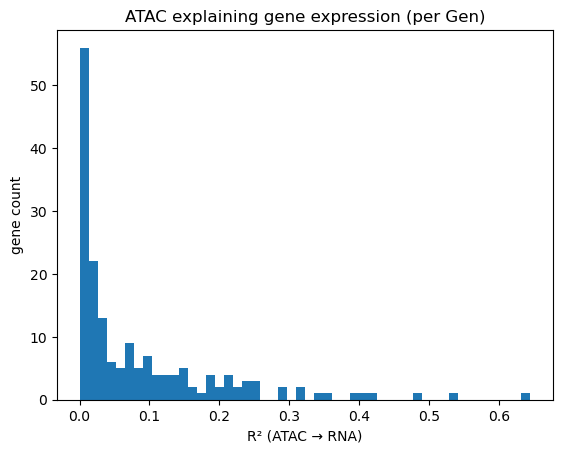

In [54]:
plt.hist(r2_per_gene.values(), bins=50)
plt.xlabel("R² (ATAC → RNA)")
plt.ylabel("gene count")
plt.title("ATAC explaining gene expression (per Gen)")
plt.savefig("figures/Histogram_regression_all_celltypes", dpi=300, bbox_inches='tight')
plt.show()


Most genes have R² ≈ 0
-> ATAC data explains almost none of their expression levels across cell types

some genes gave R² > 0.05
-> moderate correlation between ATAC signal and RNA expression.

few R² > 0.1
-> chromatin accessibility seems to have a stronger predictive value

### b) How do the coefficients differ when it is performed on your cell lineage alone?

In [55]:
RNA_Bcells_reg = RNA_reg.iloc[:, :22]
RNA_Bcells_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,3.383058,...,1.024819,1.026268,1.583160,2.031568,1.023171,1.402182,1.600163,1.024314,1.026847,1.022363
0610007P14Rik,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,138.334965,...,171.616405,160.086567,195.518058,177.296163,133.641217,159.727279,208.701696,170.095111,168.533632,259.757632
0610009B22Rik,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,40.460507,...,41.112114,35.553794,49.652232,34.400060,23.552374,62.777799,35.674041,72.665219,105.859021,56.732307
0610009L18Rik,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,16.721968,...,12.620494,9.932675,17.725758,14.867799,12.883329,12.586519,10.491921,1.823690,3.481406,3.253803
0610009O20Rik,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,87.408479,...,118.981786,97.246724,126.160167,98.479008,103.253374,95.277046,103.441058,92.176490,117.316918,61.444180


In [56]:
RNA_Bcells_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17535 entries, 0610005C13Rik to l7Rn6
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTHSC.34-.BM   17535 non-null  float64
 1   LTHSC.34+.BM   17535 non-null  float64
 2   STHSC.150-.BM  17535 non-null  float64
 3   MPP4.135+.BM   17535 non-null  float64
 4   proB.CLP.BM    17535 non-null  float64
 5   proB.FrA.BM    17535 non-null  float64
 6   proB.FrBC.BM   17535 non-null  float64
 7   B.FrE.BM       17535 non-null  float64
 8   B1b.PC         17535 non-null  float64
 9   B.T1.Sp        17535 non-null  float64
 10  B.T2.Sp        17535 non-null  float64
 11  B.T3.Sp        17535 non-null  float64
 12  B.Sp           17535 non-null  float64
 13  B.Fem.Sp       17535 non-null  float64
 14  B.MZ.Sp        17535 non-null  float64
 15  B.Fo.Sp        17535 non-null  float64
 16  B.mem.Sp       17535 non-null  float64
 17  B.GC.CB.Sp     17535 non-null  float64
 18 

In [57]:
ATAC_Bcells_reg = ATAC_reg.iloc[:, :22]
ATAC_Bcells_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13RIK,4.505625,5.851771,5.916042,4.556563,4.213125,4.846563,5.157604,5.401562,4.343646,4.896458,...,4.533854,4.674688,4.817396,5.336771,5.744062,4.506354,4.162604,5.003333,5.346563,4.437708
0610007P14RIK,2.606087,2.040652,2.899565,2.081739,1.883261,1.685000,1.797609,1.793478,1.585217,1.726739,...,1.953696,1.577826,1.257174,2.095435,1.802391,1.982609,2.242609,2.272609,2.150870,1.736957
0610009B22RIK,7.186849,8.043151,8.228356,7.145479,7.872740,7.577397,7.217397,10.161644,7.342740,9.571918,...,8.585068,7.921233,7.446301,9.762055,10.506986,8.550000,8.173288,7.118082,6.386849,4.852877
0610009L18RIK,3.792022,4.991798,6.292135,4.735618,4.871685,4.712921,4.434719,5.617528,4.269101,4.554944,...,4.545169,4.944270,4.085843,6.296742,4.559888,5.025618,4.082247,3.638652,3.111573,2.507865
0610009O20RIK,5.041613,5.535161,6.753333,5.882043,5.752366,5.921828,5.691183,6.118710,5.707097,5.277849,...,5.921075,6.427419,6.674516,6.180108,6.293333,5.414086,5.244624,6.494946,6.726452,5.921505


In [58]:
ATAC_Bcells_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23871 entries, 0610005C13RIK to ZZZ3
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTHSC.34-.BM   23871 non-null  float64
 1   LTHSC.34+.BM   23871 non-null  float64
 2   STHSC.150-.BM  23871 non-null  float64
 3   MPP4.135+.BM   23871 non-null  float64
 4   proB.CLP.BM    23871 non-null  float64
 5   proB.FrA.BM    23871 non-null  float64
 6   proB.FrBC.BM   23871 non-null  float64
 7   B.FrE.BM       23871 non-null  float64
 8   B1b.PC         23871 non-null  float64
 9   B.T1.Sp        23871 non-null  float64
 10  B.T2.Sp        23871 non-null  float64
 11  B.T3.Sp        23871 non-null  float64
 12  B.Sp           23871 non-null  float64
 13  B.Fem.Sp       23871 non-null  float64
 14  B.MZ.Sp        23871 non-null  float64
 15  B.Fo.Sp        23871 non-null  float64
 16  B.mem.Sp       23871 non-null  float64
 17  B.GC.CB.Sp     23871 non-null  float64
 18  

In [60]:
shared_genes = RNA_Bcells_reg.index.intersection(ATAC_Bcells_reg.index)
print(f"{len(shared_genes)} shared genes.")

173 shared genes.


In [61]:
#celltypes 
common_celltypes_Bcells = RNA_Bcells_reg.columns.intersection(ATAC_Bcells_reg.columns)

In [62]:
r2_per_gene_Bcells = {}

for gene in shared_genes:
    x_vals = ATAC_Bcells_reg.loc[gene, common_celltypes_Bcells].values
    y_vals = RNA_Bcells_reg.loc[gene, common_celltypes_Bcells].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    model = LinearRegression()
    model.fit(x_vals.reshape(-1, 1), y_vals)
    r2 = r2_score(y_vals, model.predict(x_vals.reshape(-1, 1)))
    r2_per_gene_Bcells[gene] = r2

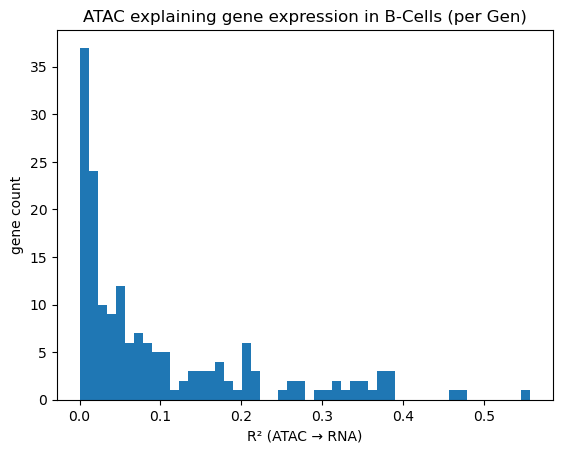

In [63]:
plt.hist(r2_per_gene_Bcells.values(), bins=50)
plt.xlabel("R² (ATAC → RNA)")
plt.ylabel("gene count")
plt.title("ATAC explaining gene expression in B-Cells (per Gen)")
plt.savefig("figures/Histogram_regression_Bcells", dpi=300, bbox_inches='tight')
plt.show()


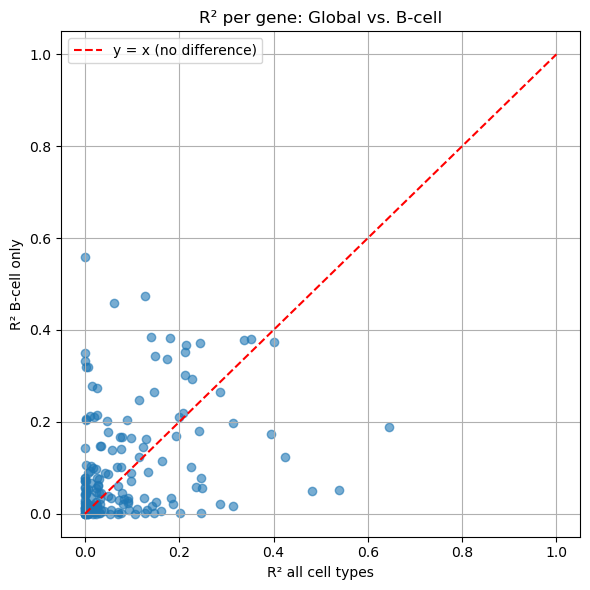

In [64]:
#compare coefficients 
shared_genes_all = set(r2_per_gene_Bcells).intersection(set(r2_per_gene))

x = [r2_per_gene[gene] for gene in shared_genes_all]
y = [r2_per_gene_Bcells[gene] for gene in shared_genes_all]

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', label='y = x (no difference)')
plt.xlabel("R² all cell types")
plt.ylabel("R² B-cell only")
plt.title("R² per gene: Global vs. B-cell")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/R^2_per_gene", dpi=300, bbox_inches='tight')
plt.show()

In [65]:
delta_r2 = np.array(y) - np.array(x)
print(f"Mean ΔR² (B-cell - Global): {np.mean(delta_r2):.4f}")

Mean ΔR² (B-cell - Global): 0.0154


mean ΔR²: 0.0453
-> chromatin accessibility in B-cells explains gene expression better than the global model across all cell types
-> gene regulation via chromatin structure is (partly) B-cell-specific
-> lineage-restricted regulatory mechanisms

### c) Which CREs control your cell lineage specific genes?

In [66]:
#B-Cell specific genes -> with high delta R^2 

delta_r2 = {gene: r2_per_gene_Bcells[gene] - r2_per_gene[gene]for gene in r2_per_gene_Bcells if gene in r2_per_gene}
bcell_specific_genes = [gene for gene, delta in delta_r2.items() if delta > 0.1]

print(f"{len(bcell_specific_genes)} B-cell-specific genes with ΔR² > 0.1")


30 B-cell-specific genes with ΔR² > 0.1


In [67]:
atac_cre_activity = ATAC_Bcells_reg.loc[bcell_specific_genes]
atac_cre_activity.head()


,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
AA414768,1.991702,1.896596,1.821489,2.096596,2.100213,2.027021,2.214468,2.083191,2.713617,1.970426,...,2.304468,2.627234,1.720426,2.544043,2.164043,1.723830,1.456809,1.187872,1.112979,1.114255
AA465934,5.403721,6.522791,6.900465,5.027442,6.568605,5.495349,6.720000,9.209767,7.123488,9.602326,...,8.352093,5.317209,6.666977,9.641628,10.063023,9.170465,7.910465,7.449070,6.199302,5.083488
AA467197,5.212963,4.663580,4.644444,7.252346,6.978395,6.341358,5.577160,4.262593,3.499383,5.060370,...,4.340370,4.605432,4.405185,4.242840,4.512222,7.365926,6.954815,5.168272,5.482716,6.490000
AI413582,5.049903,5.393786,5.256214,3.908641,4.555922,4.296505,4.098350,5.629417,4.017282,3.935922,...,3.570388,5.324563,3.363495,5.424854,4.417087,3.727767,2.924078,3.973204,3.368155,3.021748
AI450353,5.292927,6.661707,7.017073,5.062927,6.588049,5.455610,6.750732,9.390244,7.227561,9.530000,...,8.377805,5.327073,6.746341,9.563415,10.057073,9.066585,7.652439,7.496341,6.155366,4.943902


In [68]:
mean_atac_per_gene = atac_cre_activity.mean(axis=1)
mean_atac_per_gene.info()

<class 'pandas.core.series.Series'>
Index: 30 entries, AA414768 to T
Series name: None
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 480.0+ bytes


In [69]:
top_CREs_BCells = mean_atac_per_gene.sort_values(ascending=False).head(10)
print(top_CREs_BCells)

Gene
AW209491    10.566432
BC017643     9.702143
BC051226     9.005819
BC020402     8.336434
BC051628     8.111413
H2-K2        7.885413
AI662270     7.694080
AI450353     7.337417
AA465934     7.336649
AI837181     7.319653
dtype: float64


In [70]:
all_CREs_BCells = mean_atac_per_gene.sort_values(ascending=False)
print(all_CREs_BCells)

Gene
AW209491       10.566432
BC017643        9.702143
BC051226        9.005819
BC020402        8.336434
BC051628        8.111413
H2-K2           7.885413
AI662270        7.694080
AI450353        7.337417
AA465934        7.336649
AI837181        7.319653
BC023829        5.753466
AI854703        5.433077
AA467197        5.321319
AI661453        5.303182
D17H6S56E-5     5.131756
AI467606        5.034271
BC005561        4.777235
BC026585        4.445307
AW046200        4.403965
AI413582        4.391598
LOC106740       4.353310
H2-Q10          4.296526
R74862          4.192265
H2-Q4           3.584994
BC051019        3.538260
H2-Q5           3.479735
BC021767        3.149216
T               2.823829
AA414768        1.975426
AI606473        1.572496
dtype: float64


In [71]:
ATAC_Bcells = pd.read_csv("data/ATAC_Bcells.csv")
ATAC_Bcells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

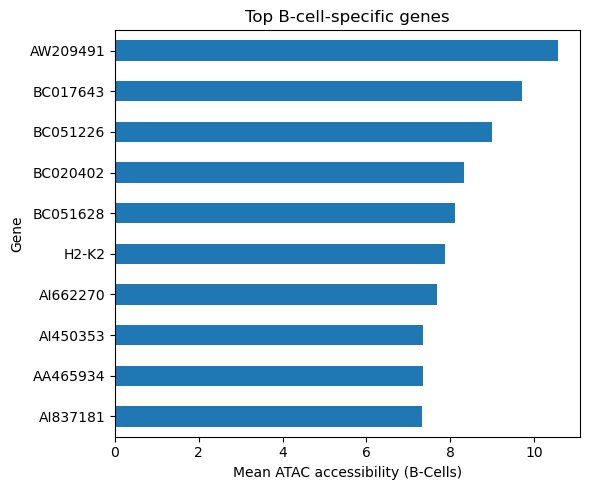

In [72]:
#only for top Genes
top_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("Top B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

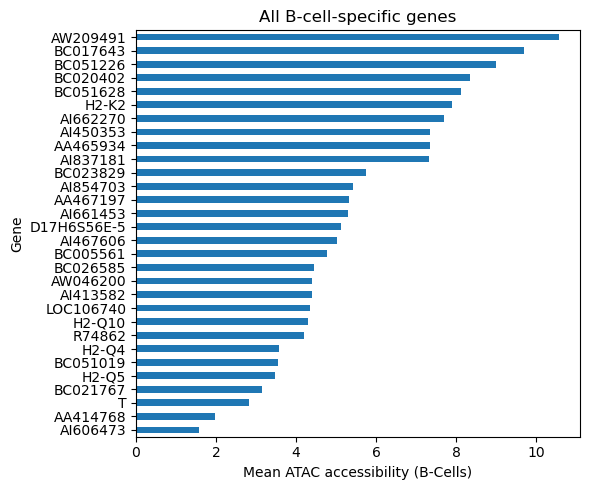

In [73]:
# for all B-Cell-Genes
all_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("All B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

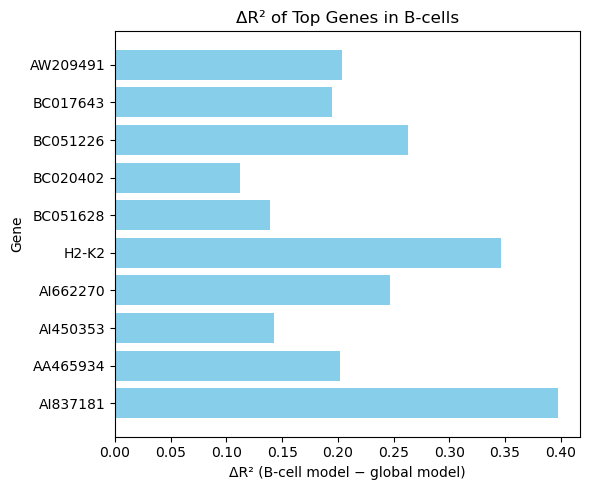

In [74]:
top_cre_genes = top_CREs_BCells.index.tolist()
delta_r2_top_cre = [delta_r2[gene] for gene in top_cre_genes]

plt.figure(figsize=(6, 5))
plt.barh(top_cre_genes, delta_r2_top_cre, color="skyblue")
plt.xlabel("ΔR² (B-cell model − global model)")
plt.ylabel("Gene")
plt.title("ΔR² of Top Genes in B-cells")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/deltaR^2_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

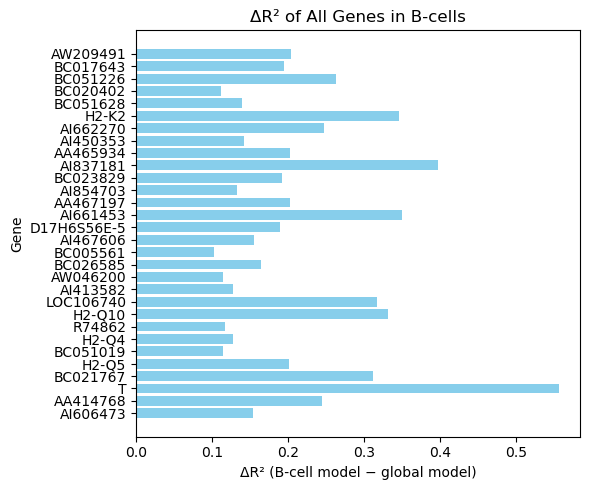

In [75]:
all_cre_genes = all_CREs_BCells.index.tolist()
delta_r2_all_cre = [delta_r2[gene] for gene in all_cre_genes]

plt.figure(figsize=(6, 5))
plt.barh(all_cre_genes, delta_r2_all_cre, color="skyblue")
plt.xlabel("ΔR² (B-cell model − global model)")
plt.ylabel("Gene")
plt.title("ΔR² of All Genes in B-cells")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/deltaR^2_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

- high delta R^2 indicates: 
- In B-cells: Genexpression explains the Chromatin-accesibility well
- In other celltypes: explanatory power of the genexpression regarding the chromatin-accesibility is weaker

CREs to this genes

In [76]:
atac_genes_bcells = atac_genes.iloc[:, list(range(22)) + [-1]]
atac_genes_bcells.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,B.T1.Sp,B.T2.Sp,B.T3.Sp,B.Sp,Gene
16,ImmGenATAC1219.peak_17,chr1,3600878,0.09,0.36,NaN,NaN,Xkr4,0.41,0.71,...,0.63,0.50,0.49,1.98,0.14,0.11,1.98,0.10,1.63,XKR4
17,ImmGenATAC1219.peak_18,chr1,3611363,0.16,3.32,1.0,NaN,Xkr4,0.41,0.10,...,0.10,1.78,1.01,0.11,0.60,1.07,0.71,1.56,0.55,XKR4
18,ImmGenATAC1219.peak_19,chr1,3670859,0.76,1.74,1.0,NaN,Xkr4,0.41,2.57,...,2.21,0.98,1.55,1.80,1.21,1.86,2.93,3.11,1.02,XKR4
19,ImmGenATAC1219.peak_20,chr1,3671114,0.94,2.02,1.0,NaN,Xkr4,0.41,6.07,...,3.03,2.53,2.69,4.05,2.58,0.50,1.21,0.57,1.02,XKR4
20,ImmGenATAC1219.peak_21,chr1,3671437,0.72,2.02,1.0,Xkr4,Xkr4,0.41,3.68,...,2.46,0.82,0.49,1.35,0.14,1.40,1.30,2.14,0.59,XKR4


In [77]:
atac_genes_bcells.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511829 entries, 16 to 512594
Data columns (total 23 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ImmGenATAC1219.peakID            1511829 non-null  object 
 1   chrom                            1511829 non-null  object 
 2   Summit                           1511829 non-null  int64  
 3   mm10.60way.phastCons_scores      1511829 non-null  float64
 4   _-log10_bestPvalue               1511829 non-null  float64
 5   Included.in.systematic.analysis  1057704 non-null  float64
 6   TSS                              78405 non-null    object 
 7   genes.within.100Kb               1511829 non-null  object 
 8   LTHSC.34-.BM                     1511829 non-null  float64
 9   LTHSC.34+.BM                     1511829 non-null  float64
 10  STHSC.150-.BM                    1511829 non-null  float64
 11  MPP4.135+.BM                     1511829 non-null  floa

In [78]:
CREs_for_BCell_specific_genes = atac_genes_bcells[atac_genes_bcells['Gene'].isin(bcell_specific_genes)].copy()
CREs_for_BCell_specific_genes.head()


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,B.T1.Sp,B.T2.Sp,B.T3.Sp,B.Sp,Gene
27477,ImmGenATAC1219.peak_27478,chr1,157368474,0.95,2.17,1.0,NaN,"Rasal2,2810025M15Rik,BC026585",0.41,2.57,...,0.34,0.98,0.80,0.78,0.60,0.11,0.44,0.32,1.19,BC026585
27478,ImmGenATAC1219.peak_27479,chr1,157369020,0.10,0.69,NaN,NaN,"Rasal2,2810025M15Rik,BC026585",2.36,2.57,...,0.34,1.29,1.85,0.57,2.00,0.11,1.03,2.60,2.01,BC026585
27479,ImmGenATAC1219.peak_27480,chr1,157372668,0.18,1.43,NaN,NaN,"Rasal2,2810025M15Rik,BC026585",0.41,1.64,...,3.79,0.11,1.49,0.78,2.78,0.91,2.34,1.45,1.19,BC026585
27480,ImmGenATAC1219.peak_27481,chr1,157378547,0.28,0.82,NaN,NaN,"Rasal2,2810025M15Rik,BC026585",0.41,2.57,...,0.40,0.11,1.17,1.26,1.75,0.91,0.87,0.10,2.01,BC026585
27481,ImmGenATAC1219.peak_27482,chr1,157380915,0.44,4.10,1.0,NaN,"Rasal2,2810025M15Rik,BC026585",0.41,2.57,...,1.35,1.78,1.69,0.80,0.93,2.87,0.87,1.53,1.20,BC026585


In [79]:
CREs_for_BCell_specific_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 27477 to 505790
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ImmGenATAC1219.peakID            2175 non-null   object 
 1   chrom                            2175 non-null   object 
 2   Summit                           2175 non-null   int64  
 3   mm10.60way.phastCons_scores      2175 non-null   float64
 4   _-log10_bestPvalue               2175 non-null   float64
 5   Included.in.systematic.analysis  1561 non-null   float64
 6   TSS                              166 non-null    object 
 7   genes.within.100Kb               2175 non-null   object 
 8   LTHSC.34-.BM                     2175 non-null   float64
 9   LTHSC.34+.BM                     2175 non-null   float64
 10  STHSC.150-.BM                    2175 non-null   float64
 11  MPP4.135+.BM                     2175 non-null   float64
 12  proB.CLP.BM        

In [80]:
CREs_ID_for_BCell_specific_genes = CREs_for_BCell_specific_genes ['ImmGenATAC1219.peakID'].unique()
print(f"{len(CREs_ID_for_BCell_specific_genes)} CREs (Peaks) regulate B-cell-specific gene")

1900 CREs (Peaks) regulate B-cell-specific gene


In [81]:
#add mean and save as dataframe

CREs_for_BCell_specific_genes['Bcell_ATAC_mean'] = CREs_for_BCell_specific_genes.iloc[:, 8:22].mean(axis=1)
CREs_ID_for_BCell_specific_genes_df = CREs_for_BCell_specific_genes[['ImmGenATAC1219.peakID', 'Gene', 'chrom', 'Bcell_ATAC_mean']]


CREs_ID_for_BCell_specific_genes_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean
27477,ImmGenATAC1219.peak_27478,BC026585,chr1,0.681429
27478,ImmGenATAC1219.peak_27479,BC026585,chr1,1.417143
27479,ImmGenATAC1219.peak_27480,BC026585,chr1,1.890000
27480,ImmGenATAC1219.peak_27481,BC026585,chr1,0.897143
27481,ImmGenATAC1219.peak_27482,BC026585,chr1,1.416429


### d) How do the results of this analysis differ from pure association via correlation?

correlation and R^2

In [82]:
correlation_per_gene_Bcells = {}

for gene in shared_genes:
    x_vals = ATAC_Bcells_reg.loc[gene, common_celltypes_Bcells].values
    y_vals = RNA_Bcells_reg.loc[gene, common_celltypes_Bcells].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    corr, _ = pearsonr(x_vals, y_vals)
    correlation_per_gene_Bcells[gene] = corr

In [83]:
genes_with_both = list(set(r2_per_gene_Bcells.keys()).intersection(correlation_per_gene_Bcells.keys()))

r2_vals = [r2_per_gene_Bcells[gene] for gene in genes_with_both]
cor_vals = [correlation_per_gene_Bcells[gene] for gene in genes_with_both]

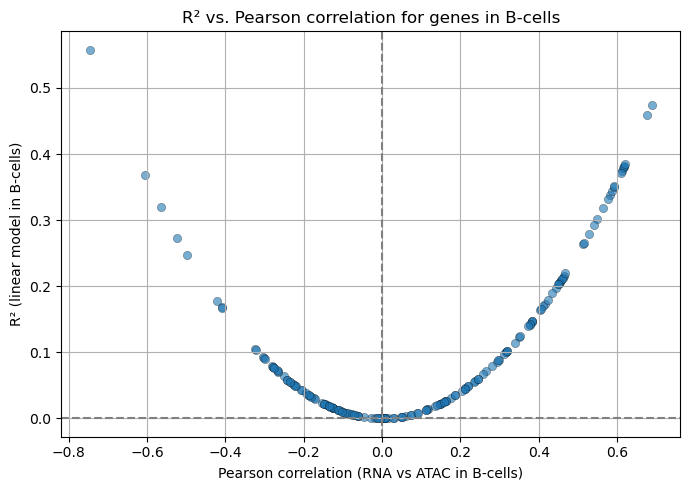

In [84]:
plt.figure(figsize=(7,5))
plt.scatter(cor_vals, r2_vals, alpha=0.6, edgecolor='k', linewidth=0.3)
plt.xlabel("Pearson correlation (RNA vs ATAC in B-cells)")
plt.ylabel("R² (linear model in B-cells)")
plt.title("R² vs. Pearson correlation for genes in B-cells")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/R^2_vs_pearson_correlation", dpi=300, bbox_inches='tight')
plt.show()

- correlation measures direction and strength of linear association
- R² reflects how well a linear model explains gene expression from accessibility
- even genes with low or negative correlation can have high R² -> correlation alone underestimates cell-type specific regulatory explanatory power

- correlation: only if there is a relationship (negativ or positiv), but no information about direction
- R^2: how well does the chromatin-accesibility predict the genexpression (ATAC -> RNA) 

cell-specific effects

In [85]:
shared_genes = RNA_Bcells_reg.index.intersection(ATAC_Bcells_reg.index)

correlations = []
for gene in shared_genes:
    rna_values = RNA_Bcells_reg.loc[gene].values
    atac_values = ATAC_Bcells_reg.loc[gene].values
    if np.std(rna_values) > 0 and np.std(atac_values) > 0:
        corr, _ = pearsonr(atac_values, rna_values)
    else:
        corr = np.nan  
    correlations.append(corr)

In [86]:
result_corr_df = pd.DataFrame({'Gene': shared_genes,'Correlation': correlations,'Delta_R2': [delta_r2.get(gene, np.nan) for gene in shared_genes]}).dropna()
result_corr_df.head()

,Gene,Correlation,Delta_R2
0,A630020A06,-0.187405,-0.020013
1,AA387883,0.004624,-0.006565
2,AA388235,0.296344,-0.009417
3,AA414768,0.620266,0.244955
4,AA415398,-0.071799,0.005135


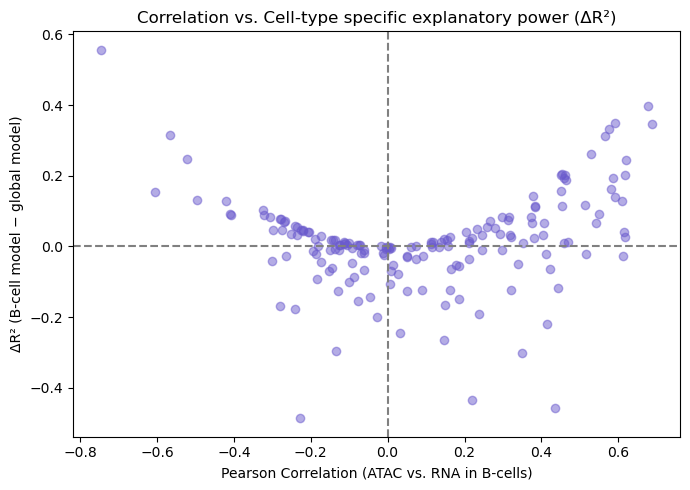

In [87]:
plt.figure(figsize=(7, 5))
plt.scatter(result_corr_df['Correlation'], result_corr_df['Delta_R2'], alpha=0.5, color='slateblue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Pearson Correlation (ATAC vs. RNA in B-cells)")
plt.ylabel("ΔR² (B-cell model − global model)")
plt.title("Correlation vs. Cell-type specific explanatory power (ΔR²)")
plt.tight_layout()
plt.savefig("figures/deltaR^2_vs_pearson_correlation", dpi=300, bbox_inches='tight')
plt.show()

### e) Are there differences between activating and repressing CREs?

- activting CREs -> positive correlation : ATAC uand gene-expression
- repressing CREs -> negative correlation : ATAC uand gene-expression


In [88]:
activating_CREs = [gene for gene, corr in correlation_per_gene_Bcells.items() if corr > 0.3]
repressing_CREs = [gene for gene, corr in correlation_per_gene_Bcells.items() if corr < -0.3]


In [89]:
activating_r2 = [r2_per_gene_Bcells[gene] for gene in activating_CREs if gene in r2_per_gene_Bcells]
repressing_r2 = [r2_per_gene_Bcells[gene] for gene in repressing_CREs if gene in r2_per_gene_Bcells]

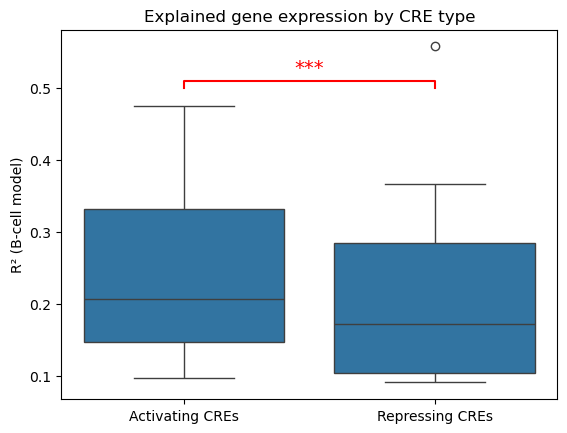

In [90]:
sns.boxplot(data=[activating_r2, repressing_r2], palette=['#1f77b4', '#1f77b4'])
plt.xticks([0, 1], ["Activating CREs", "Repressing CREs"])
plt.ylabel("R² (B-cell model)")
plt.title("Explained gene expression by CRE type")

y_max = max(max(activating_r2), max(repressing_r2))  
y_sig = 0.5  
h = 0.01  

plt.plot([0, 0, 1, 1], [y_sig, y_sig + h, y_sig + h, y_sig], lw=1.5, c='red')
plt.text(0.5, y_sig + h + 0.005, '***', ha='center', va='bottom', fontsize=14, c='red')

plt.savefig("figures/boxplot_variance_by_CRE_type", dpi=300, bbox_inches='tight')
plt.show()

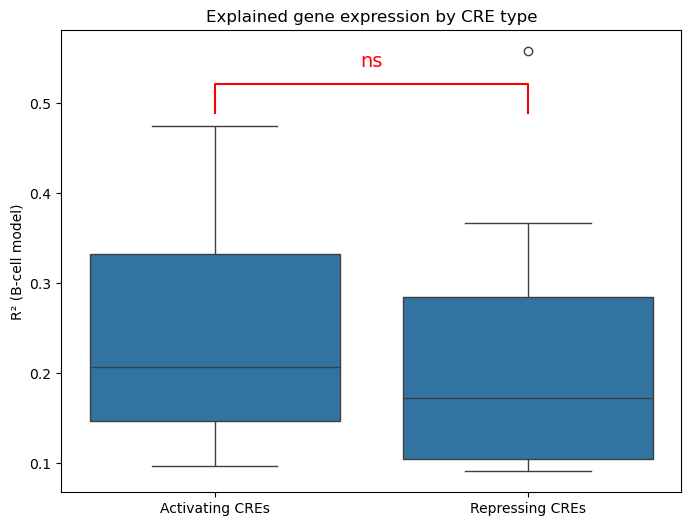

In [91]:
t_stat, p_value = ttest_ind(activating_r2, repressing_r2, equal_var=False)

def get_significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

stars = get_significance_stars(p_value)

plt.figure(figsize=(8, 6))
sns.boxplot(data=[activating_r2, repressing_r2], palette=['#1f77b4', '#1f77b4'])
plt.xticks([0, 1], ["Activating CREs", "Repressing CREs"])
plt.ylabel("R² (B-cell model)")
plt.title("Explained gene expression by CRE type")

def get_whisker_top(data):
    data = np.array(data) 
    q3 = np.percentile(data, 75)
    iqr = q3 - np.percentile(data, 25)
    whisker = min(np.max(data[data <= q3 + 1.5 * iqr]), np.max(data))
    return whisker

whisker_1 = get_whisker_top(activating_r2)
whisker_2 = get_whisker_top(repressing_r2)
y = max(whisker_1, whisker_2)
offset = y * 0.1 

plt.plot([0, 0, 1, 1], [y + offset*0.3, y + offset, y + offset, y + offset*0.3], c='red', lw=1.5)
plt.text(0.5, y + offset * 1.3, stars, ha='center', va='bottom', fontsize=14, color='red')

plt.savefig("figures/boxplot_variance_by_CRE_type", dpi=300, bbox_inches='tight')
plt.show()

In [92]:
t_stat, p_val = ttest_ind(activating_r2, repressing_r2)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3e}")

T-statistic: 0.335, p-value: 7.390e-01


means per CRE type

In [93]:
CREs_ID_for_BCell_specific_genes_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean
27477,ImmGenATAC1219.peak_27478,BC026585,chr1,0.681429
27478,ImmGenATAC1219.peak_27479,BC026585,chr1,1.417143
27479,ImmGenATAC1219.peak_27480,BC026585,chr1,1.890000
27480,ImmGenATAC1219.peak_27481,BC026585,chr1,0.897143
27481,ImmGenATAC1219.peak_27482,BC026585,chr1,1.416429


In [94]:
CREs_ID_for_BCell_specific_genes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 27477 to 505790
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  2175 non-null   object 
 1   Gene                   2175 non-null   object 
 2   chrom                  2175 non-null   object 
 3   Bcell_ATAC_mean        2175 non-null   float64
dtypes: float64(1), object(3)
memory usage: 85.0+ KB


In [95]:
activating_CREs_df = CREs_ID_for_BCell_specific_genes_df[CREs_ID_for_BCell_specific_genes_df['Gene'].isin(activating_CREs)].copy()
repressing_CREs_df = CREs_ID_for_BCell_specific_genes_df[CREs_ID_for_BCell_specific_genes_df['Gene'].isin(repressing_CREs)].copy()

activating_CREs_df['Type'] = 'Activating'
repressing_CREs_df['Type'] = 'Repressing'

C:\Users\annal\AppData\Local\Temp\ipykernel_19268\3898617604.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Bcell_ATAC_mean', data=combined_CREs_df, palette=['#1f77b4', '#1f77b4'])


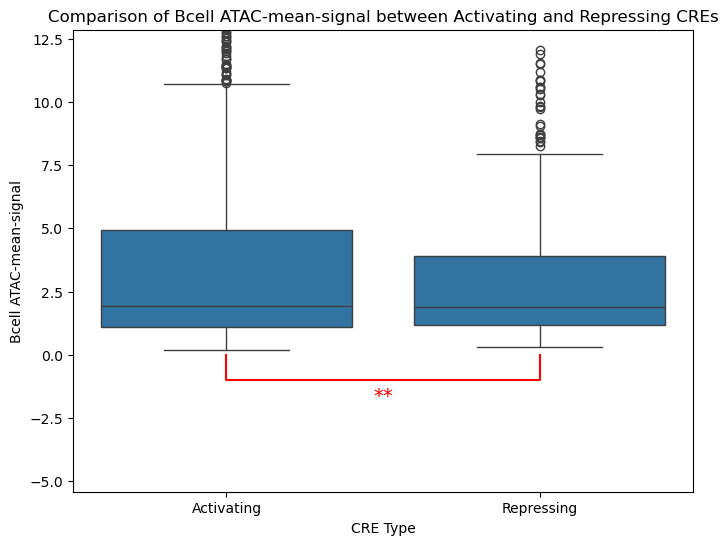

In [96]:
combined_CREs_df = pd.concat([activating_CREs_df, repressing_CREs_df])

activating_values = combined_CREs_df[combined_CREs_df['Type'] == 'Activating']['Bcell_ATAC_mean'].dropna()
repressing_values = combined_CREs_df[combined_CREs_df['Type'] == 'Repressing']['Bcell_ATAC_mean'].dropna()

t_stat, p_value = ttest_ind(activating_values, repressing_values, equal_var=False)

def get_significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

stars = get_significance_stars(p_value)

def get_whisker_top(data):
    data = np.array(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - np.percentile(data, 25)
    whisker = min(np.max(data[data <= q3 + 1.5 * iqr]), np.max(data))
    return whisker

whisker_1 = get_whisker_top(activating_values)
whisker_2 = get_whisker_top(repressing_values)
y = max(whisker_1, whisker_2)
offset = y * 0.1 

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Bcell_ATAC_mean', data=combined_CREs_df, palette=['#1f77b4', '#1f77b4'])
plt.title('Comparison of Bcell ATAC-mean-signal between Activating and Repressing CREs')
plt.ylabel('Bcell ATAC-mean-signal')
plt.xlabel('CRE Type')
plt.ylim(top=y + offset * 2)

plt.plot([0, 0, 1, 1], [0, -1, -1, 0], lw=1.5, c='red')
plt.text(0.5, -2, stars, ha='center', va='bottom', fontsize=14, color='red')

plt.savefig("figures/comparison_of_ATAC_mean_activating_repressing_CREs", dpi=300, bbox_inches='tight')
plt.show()

In [97]:
activating_values = activating_CREs_df['Bcell_ATAC_mean']
repressing_values = repressing_CREs_df['Bcell_ATAC_mean']

print('Mean Bcell_ATAC_mean activating:', activating_values.mean())
print('Mean Bcell_ATAC_mean repressing:', repressing_values.mean())

u_stat, p_value = stats.mannwhitneyu(activating_values, repressing_values)
print('Mann-Whitney U test p-value:', p_value)


Mean Bcell_ATAC_mean activating: 5.699261792848749
Mean Bcell_ATAC_mean repressing: 4.476757777106615
Mann-Whitney U test p-value: 0.9635929324387557


In [98]:
t_stat, p_val = ttest_ind(activating_values, repressing_values)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3e}")

T-statistic: 2.295, p-value: 2.184e-02


- Mann-Whitney U test: there is a significant difference

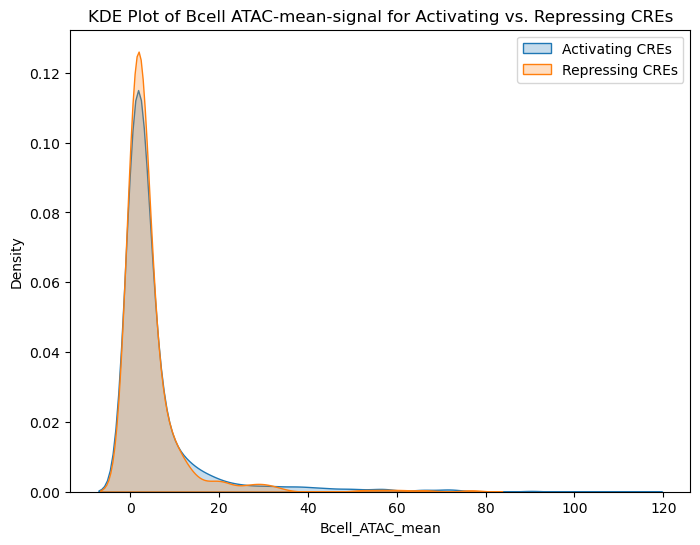

In [99]:
plt.figure(figsize=(8,6))
sns.kdeplot(activating_CREs_df['Bcell_ATAC_mean'], label='Activating CREs', fill=True)
sns.kdeplot(repressing_CREs_df['Bcell_ATAC_mean'], label='Repressing CREs', fill=True)
plt.title('KDE Plot of Bcell ATAC-mean-signal for Activating vs. Repressing CREs')
plt.xlabel('Bcell_ATAC_mean')
plt.ylabel('Density')
plt.legend()
plt.savefig("figures/KDE_plot_ATAC_mean_activating_repressing_CREs", dpi=300, bbox_inches='tight')
plt.show()

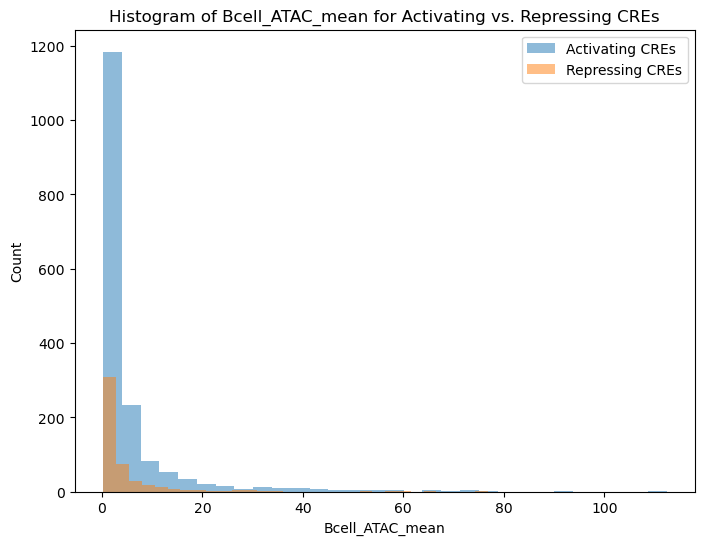

In [100]:
plt.figure(figsize=(8,6))
plt.hist(activating_CREs_df['Bcell_ATAC_mean'], bins=30, alpha=0.5, label='Activating CREs')
plt.hist(repressing_CREs_df['Bcell_ATAC_mean'], bins=30, alpha=0.5, label='Repressing CREs')
plt.title('Histogram of Bcell_ATAC_mean for Activating vs. Repressing CREs')
plt.xlabel('Bcell_ATAC_mean')
plt.ylabel('Count')
plt.legend()
plt.savefig("figures/Histogram_ATAC_mean_activating_repressing_CREs", dpi=300, bbox_inches='tight')
plt.show()

compare location on chromosome

In [101]:
print('Chromosome distribution activating CREs:')
print(activating_CREs_df['chrom'].value_counts())

print('Chromosome distribution repressing CREs:')
print(repressing_CREs_df['chrom'].value_counts())


Chromosome distribution activating CREs:
chrom
chr17    670
chr7     317
chr2     155
chr11    133
chr19     89
chr8      83
chr1      74
chrX      63
chr10     58
chr3      40
chr13     20
Name: count, dtype: int64
Chromosome distribution repressing CREs:
chrom
chr17    213
chr6     126
chr3      57
chr11     41
chr5      36
Name: count, dtype: int64


### f) How many genes are mainly regulated by repressing CREs, and can promoters act through repression?

genes regulated by repressing CREs

In [102]:
activating_counts = activating_CREs_df['Gene'].value_counts()
repressing_counts = repressing_CREs_df['Gene'].value_counts()

CRE_type_counts_df = pd.DataFrame({'activating': activating_counts,'repressing': repressing_counts}).fillna(0)
CRE_type_counts_df.head()

,activating,repressing
Gene,,
AA414768,47.0,0.0
AA465934,43.0,0.0
AA467197,81.0,0.0
AI413582,0.0,103.0
AI450353,41.0,0.0


In [103]:
CRE_type_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, AA414768 to T
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   activating  30 non-null     float64
 1   repressing  30 non-null     float64
dtypes: float64(2)
memory usage: 720.0+ bytes


In [104]:
mainly_repressed_genes = CRE_type_counts_df[CRE_type_counts_df['repressing'] > CRE_type_counts_df['activating']]
num_genes_repressed = len(mainly_repressed_genes)
print("Number of genes mainly regulated by repressing CREs:", num_genes_repressed)


Number of genes mainly regulated by repressing CREs: 7


In [105]:
mainly_activated_genes = CRE_type_counts_df[CRE_type_counts_df['activating'] > CRE_type_counts_df['repressing']]
num_genes_activated = len(mainly_activated_genes)

In [106]:
num_genes_equal = len(CRE_type_counts_df[CRE_type_counts_df['activating'] == CRE_type_counts_df['repressing']])

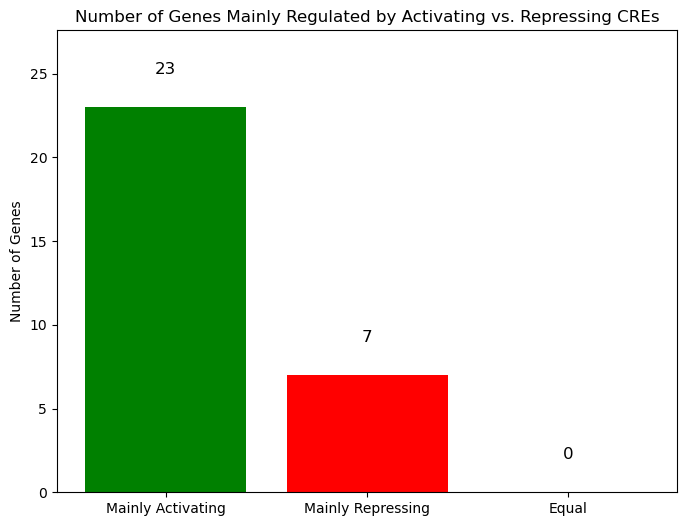

In [107]:
categories = ['Mainly Activating', 'Mainly Repressing', 'Equal']
values = [num_genes_activated, num_genes_repressed, num_genes_equal]

plt.figure(figsize=(8,6))
bars = plt.bar(categories, values, color=['green', 'red', 'gray'])
plt.ylabel('Number of Genes')
plt.title('Number of Genes Mainly Regulated by Activating vs. Repressing CREs')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', fontsize=12)

plt.ylim(top=max(values) * 1.2)

plt.savefig("figures/number_of_genes_regulated_activating_repressing", dpi=300, bbox_inches='tight')
plt.show()


can promotors act through repression 

In [108]:
ATAC_regiontype = pd.read_csv("data/ATAC_regiontype.csv")
ATAC_regiontype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512384 entries, 0 to 512383
Columns: 102 entries, Unnamed: 0 to mean_signal_all_celltypes
dtypes: float64(95), int64(2), object(5)
memory usage: 398.7+ MB


In [109]:
print(ATAC_regiontype.columns.tolist())

['Unnamed: 0', 'ImmGenATAC1219.peakID', 'chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1

In [110]:
ATAC_regiontype.head()

,Unnamed: 0,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,...,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,distance_to_nearest_TSS,annotation,mean_signal_all_celltypes
0,0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,...,1.37,0.52,1.27,0.10,0.57,3.27,1.41,-650712.0,enhancer,1.053556
1,1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,...,0.47,0.11,0.92,0.98,2.16,2.34,0.94,-584272.0,enhancer,0.929000
2,2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,2.36,...,0.95,0.11,63.38,8.92,1.33,1.04,0.11,-551389.0,enhancer,1.521000
3,3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.41,...,0.11,0.92,13.50,0.98,1.28,1.04,0.11,-550013.0,enhancer,0.874556
4,4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.41,...,1.79,0.51,0.92,0.75,1.33,1.61,4.50,-298711.0,enhancer,0.882111


In [111]:
ATAC_promoter_peaks = ATAC_regiontype[ATAC_regiontype['annotation'].str.contains('promoter', case=False, na=False)]
ATAC_promoter_peaks.head()

,Unnamed: 0,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,...,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,distance_to_nearest_TSS,annotation,mean_signal_all_celltypes
20,20,ImmGenATAC1219.peak_21,chr1,3671437,0.72,2.02,1.0,Xkr4,Xkr4,0.41,...,1.87,0.92,4.97,2.62,2.64,2.83,17.14,-61.0,promoter,1.954444
139,139,ImmGenATAC1219.peak_140,chr1,4785675,0.41,15.87,1.0,Mrpl15,"Mrpl15,Lypla1,Tcea1",9.93,...,22.06,20.80,33.25,23.63,20.90,13.30,22.38,-51.0,promoter,29.135000
159,159,ImmGenATAC1219.peak_160,chr1,4858351,0.02,7.78,1.0,Tcea1,"Mrpl15,Lypla1,Tcea1",4.37,...,10.37,9.80,8.34,8.76,17.31,8.39,11.08,24.0,promoter,12.810667
188,188,ImmGenATAC1219.peak_189,chr1,5019412,0.28,13.74,1.0,NaN,"Rgs20,Atp6v1h",7.00,...,1.37,1.75,16.13,6.53,6.80,26.53,63.81,-127.0,promoter,5.482222
202,202,ImmGenATAC1219.peak_203,chr1,5083125,0.14,30.68,1.0,Atp6v1h,"Rgs20,Atp6v1h",36.48,...,40.87,41.62,34.53,43.31,39.08,49.12,32.88,40.0,promoter,42.556111


In [112]:
repressing_CREs_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean,Type
84059,ImmGenATAC1219.peak_84060,AI662270,chr11,0.503571,Repressing
84060,ImmGenATAC1219.peak_84061,AI662270,chr11,0.792143,Repressing
84061,ImmGenATAC1219.peak_84062,AI662270,chr11,0.293571,Repressing
84062,ImmGenATAC1219.peak_84063,AI662270,chr11,0.337143,Repressing
84063,ImmGenATAC1219.peak_84064,AI662270,chr11,1.053571,Repressing


In [113]:
repressing_CREs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 84059 to 397099
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  473 non-null    object 
 1   Gene                   473 non-null    object 
 2   chrom                  473 non-null    object 
 3   Bcell_ATAC_mean        473 non-null    float64
 4   Type                   473 non-null    object 
dtypes: float64(1), object(4)
memory usage: 22.2+ KB


In [114]:
#find similar peaks 

repressing_promoters = repressing_CREs_df[repressing_CREs_df['ImmGenATAC1219.peakID'].isin(ATAC_promoter_peaks['ImmGenATAC1219.peakID'])]
print(f'Number of repressing CREs that are promoters: {len(repressing_promoters)}')

Number of repressing CREs that are promoters: 28


In [115]:
all_promoter_ids = set(ATAC_promoter_peaks['ImmGenATAC1219.peakID'])

repressing_promoter_ids = set(repressing_promoters['ImmGenATAC1219.peakID'])

non_repressing_promoter_ids = all_promoter_ids - repressing_promoter_ids

num_repressing_promoters = len(repressing_promoter_ids)
num_non_repressing_promoters = len(non_repressing_promoter_ids)



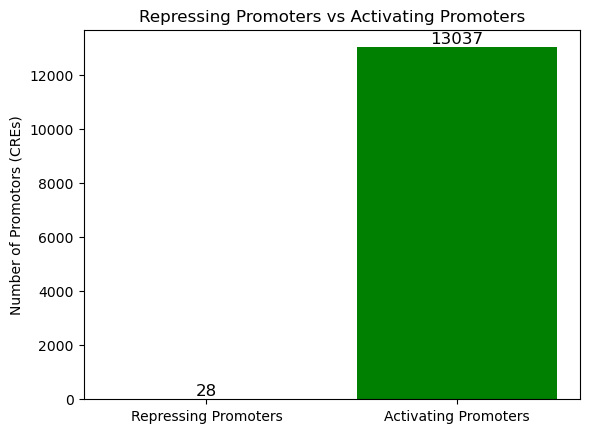

In [116]:
labels = ['Repressing Promoters', 'Activating Promoters']
values = [num_repressing_promoters, num_non_repressing_promoters]

plt.bar(labels, values, color=['red', 'green'])
plt.ylabel('Number of Promotors (CREs)')
plt.title('Repressing Promoters vs Activating Promoters')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, str(v), ha='center', fontsize=12)

plt.savefig("figures/number_of_promoters_activating_repressing", dpi=300, bbox_inches='tight')
plt.show()

### g) Where are repressing CREs located compared to activating CREs?

on chromosome:

In [117]:
print('Chromosome distribution activating CREs:')
print(activating_CREs_df['chrom'].value_counts())

print('Chromosome distribution repressing CREs:')
print(repressing_CREs_df['chrom'].value_counts())


Chromosome distribution activating CREs:
chrom
chr17    670
chr7     317
chr2     155
chr11    133
chr19     89
chr8      83
chr1      74
chrX      63
chr10     58
chr3      40
chr13     20
Name: count, dtype: int64
Chromosome distribution repressing CREs:
chrom
chr17    213
chr6     126
chr3      57
chr11     41
chr5      36
Name: count, dtype: int64


In [118]:
activating_CREs_counts = activating_CREs_df['chrom'].value_counts().sort_index()
repressing_CREs_counts = repressing_CREs_df['chrom'].value_counts().sort_index()

chromosomes = sorted(set(activating_CREs_counts.index) | set(repressing_CREs_counts.index))

activating_CREs_vals = [activating_CREs_counts.get(chrom, 0) for chrom in chromosomes]
repressing_CREs_vals = [repressing_CREs_counts.get(chrom, 0) for chrom in chromosomes]

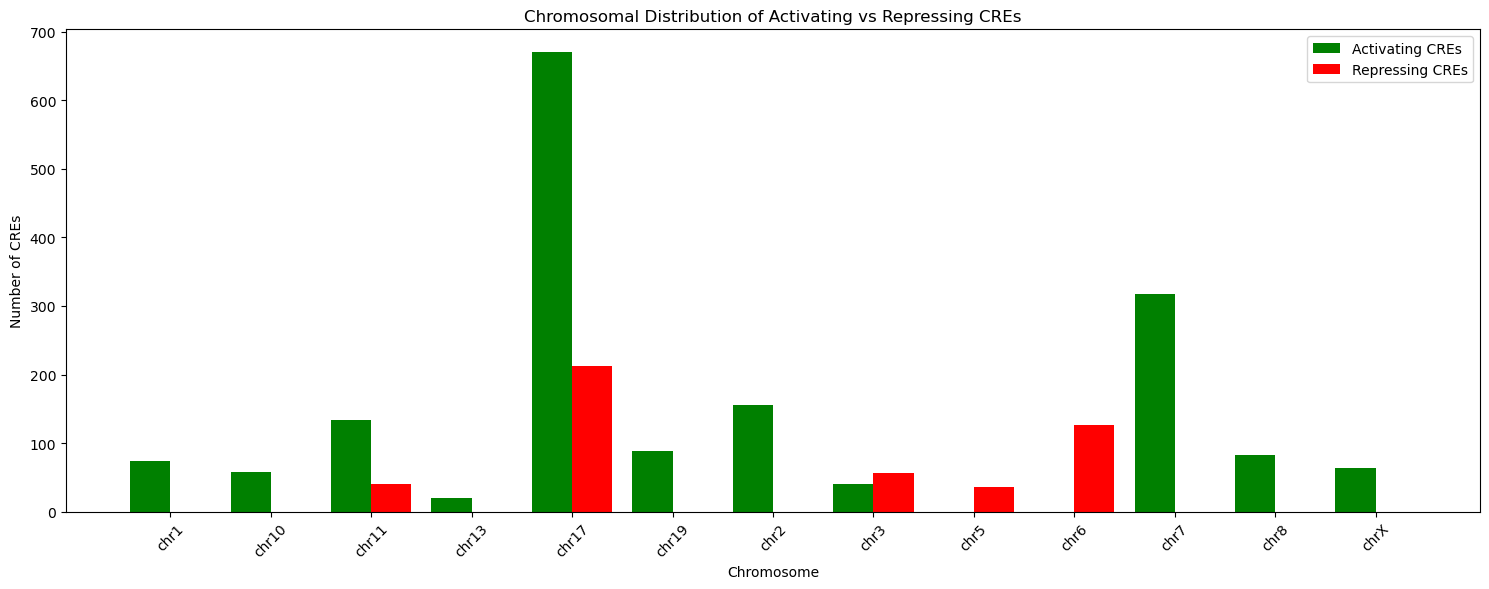

In [119]:
bar_width = 0.4
x = range(len(chromosomes))

plt.figure(figsize=(15,6))

plt.bar([i - bar_width/2 for i in x], activating_CREs_vals, width=bar_width, label='Activating CREs', color='green')
plt.bar([i + bar_width/2 for i in x], repressing_CREs_vals, width=bar_width, label='Repressing CREs', color='red')

plt.xticks(ticks=x, labels=chromosomes, rotation=45)
plt.xlabel('Chromosome')
plt.ylabel('Number of CREs')
plt.title('Chromosomal Distribution of Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.savefig("figures/location_of_activating_repressing_CREs_chromosome", dpi=300, bbox_inches='tight')
plt.show()

location to TSS

In [120]:
ATAC_with_TSS = pd.read_csv("data/ATAC_with_TSS.csv")
ATAC_with_TSS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 100 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       512595 non-null  int64  
 1   ImmGenATAC1219.peakID            512595 non-null  object 
 2   chrom                            512595 non-null  object 
 3   Summit                           512595 non-null  int64  
 4   mm10.60way.phastCons_scores      512595 non-null  float64
 5   _-log10_bestPvalue               512595 non-null  float64
 6   Included.in.systematic.analysis  334879 non-null  float64
 7   TSS                              14292 non-null   object 
 8   genes.within.100Kb               427710 non-null  object 
 9   LTHSC.34-.BM                     512595 non-null  float64
 10  LTHSC.34+.BM                     512595 non-null  float64
 11  STHSC.150-.BM                    512595 non-null  float64
 12  M

In [121]:
ATAC_with_TSS.head()

,Unnamed: 0,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,distance_to_nearest_TSS
0,0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,...,0.10,3.19,1.37,0.52,1.27,0.10,0.57,3.27,1.41,-650712.0
1,1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,...,0.10,1.41,0.47,0.11,0.92,0.98,2.16,2.34,0.94,-584272.0
2,2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,2.36,...,0.54,2.72,0.95,0.11,63.38,8.92,1.33,1.04,0.11,-551389.0
3,3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.41,...,1.83,0.66,0.11,0.92,13.50,0.98,1.28,1.04,0.11,-550013.0
4,4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.41,...,0.10,0.66,1.79,0.51,0.92,0.75,1.33,1.61,4.50,-298711.0


In [122]:
repressing_dist = ATAC_with_TSS[ATAC_with_TSS['ImmGenATAC1219.peakID'].isin(repressing_CREs_df['ImmGenATAC1219.peakID'])]['distance_to_nearest_TSS'].dropna()

activating_dist = ATAC_with_TSS[ATAC_with_TSS['ImmGenATAC1219.peakID'].isin(activating_CREs_df['ImmGenATAC1219.peakID'])]['distance_to_nearest_TSS'].dropna()

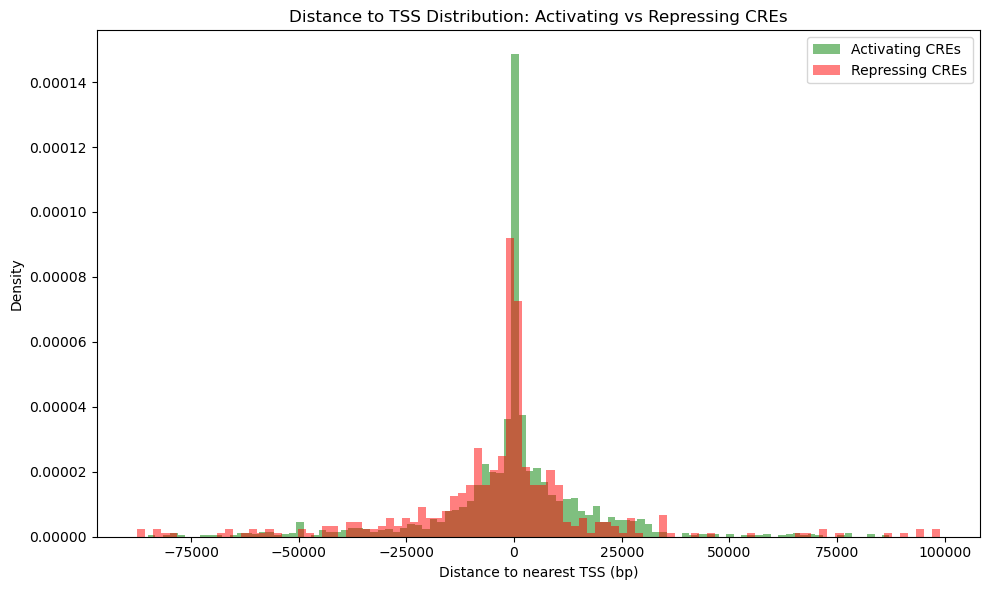

In [123]:
plt.figure(figsize=(10,6))
plt.hist(activating_dist, bins=100, alpha=0.5, label='Activating CREs', color='green', density=True)
plt.hist(repressing_dist, bins=100, alpha=0.5, label='Repressing CREs', color='red', density=True)

plt.xlabel('Distance to nearest TSS (bp)')
plt.ylabel('Density')
plt.title('Distance to TSS Distribution: Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.show()


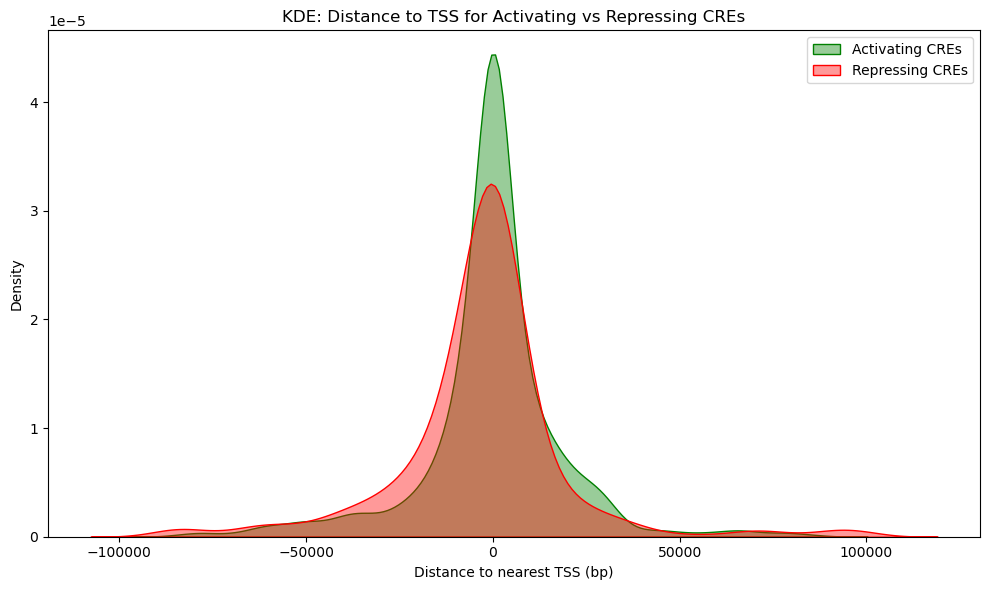

In [124]:
plt.figure(figsize=(10,6))

sns.kdeplot(activating_dist, label='Activating CREs', color='green', fill=True, alpha=0.4)
sns.kdeplot(repressing_dist, label='Repressing CREs', color='red', fill=True, alpha=0.4)

plt.xlabel('Distance to nearest TSS (bp)')
plt.ylabel('Density')
plt.title('KDE: Distance to TSS for Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.savefig("figures/location_of_activating_repressing_CREs_TSS", dpi=300, bbox_inches='tight')
plt.show()

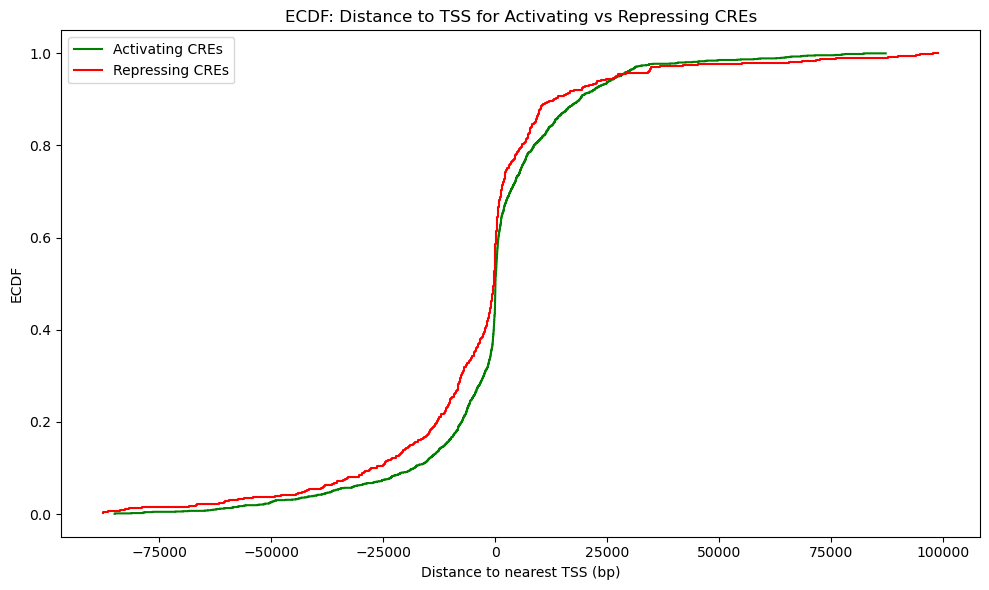

In [125]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x_activ, y_activ = ecdf(activating_dist)
x_repress, y_repress = ecdf(repressing_dist)

plt.figure(figsize=(10,6))
plt.step(x_activ, y_activ, label='Activating CREs', color='green')
plt.step(x_repress, y_repress, label='Repressing CREs', color='red')

plt.xlabel('Distance to nearest TSS (bp)')
plt.ylabel('ECDF')
plt.title('ECDF: Distance to TSS for Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.savefig("figures/ECDF_location_of_activating_repressing_CREs_TSS", dpi=300, bbox_inches='tight')
plt.show()

- Repressing CREs: a bit closer to TSS than activating CREs (rises faster for negative values/ more CREs in shorter distance)



### h) Are there CREs that are repressing for one gene but activating for another gene?
            

In [126]:
cre_gene_correlation = []

for gene, corr in correlation_per_gene_Bcells.items():
    cre_ids = atac_genes_bcells[atac_genes_bcells['Gene'] == gene]['ImmGenATAC1219.peakID'].unique()
    for cre in cre_ids:
        cre_gene_correlation.append((cre, gene, corr))

cre_gene_corr_df = pd.DataFrame(cre_gene_correlation, columns=['peakID', 'Gene', 'correlation'])


In [127]:

def is_mixed_effect(group):
    return (group['correlation'] > 0.3).any() and (group['correlation'] < -0.3).any()

mixed_cre = cre_gene_corr_df.groupby('peakID').filter(is_mixed_effect)


In [128]:
mixed_cre.head()

,peakID,Gene,correlation
307,ImmGenATAC1219.peak_84069,AA465934,0.45084
308,ImmGenATAC1219.peak_84070,AA465934,0.45084
309,ImmGenATAC1219.peak_84071,AA465934,0.45084
310,ImmGenATAC1219.peak_84072,AA465934,0.45084
311,ImmGenATAC1219.peak_84073,AA465934,0.45084


In [129]:
mixed_cre['peakID'].nunique() 


32

C:\Users\annal\AppData\Local\Temp\ipykernel_19268\2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


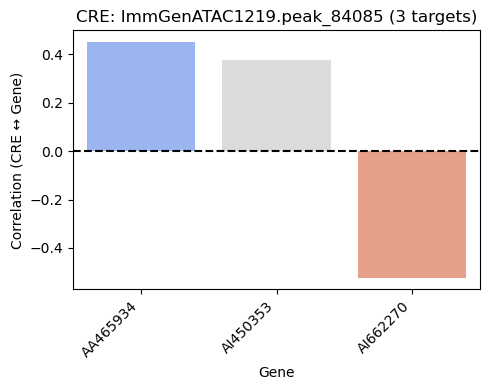

C:\Users\annal\AppData\Local\Temp\ipykernel_19268\2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


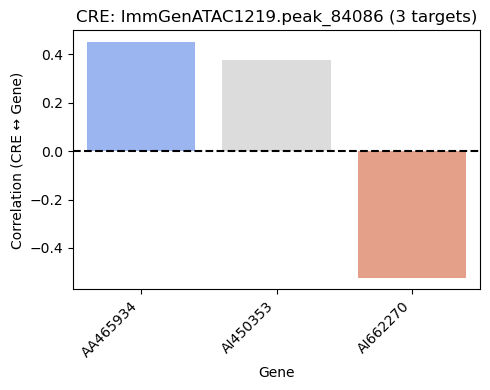

C:\Users\annal\AppData\Local\Temp\ipykernel_19268\2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


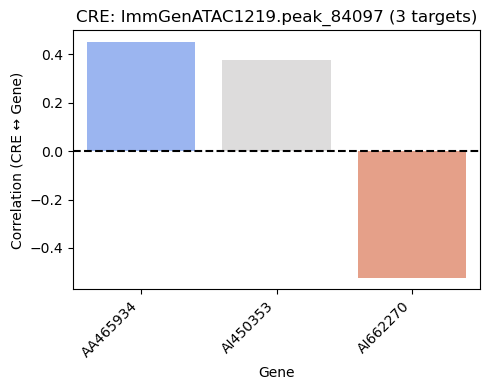

C:\Users\annal\AppData\Local\Temp\ipykernel_19268\2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


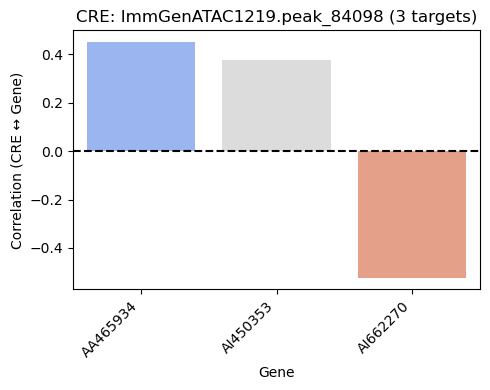

C:\Users\annal\AppData\Local\Temp\ipykernel_19268\2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


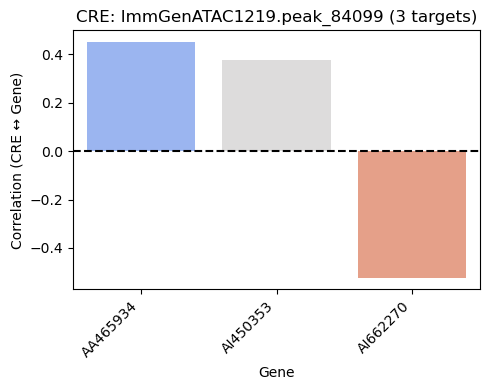

In [130]:
conflicting_CREs = mixed_cre.groupby('peakID').filter(
    lambda x: (x['correlation'] > 0.3).any() and (x['correlation'] < -0.3).any())

# only top CREs
top_CREs = conflicting_CREs['peakID'].value_counts().head(5).index
subset = conflicting_CREs[conflicting_CREs['peakID'].isin(top_CREs)]

for cre, group in subset.groupby('peakID'):
    plt.figure(figsize=(5, 4))
    sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f'CRE: {cre} ({len(group)} targets)')
    plt.ylabel('Correlation (CRE ↔ Gene)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


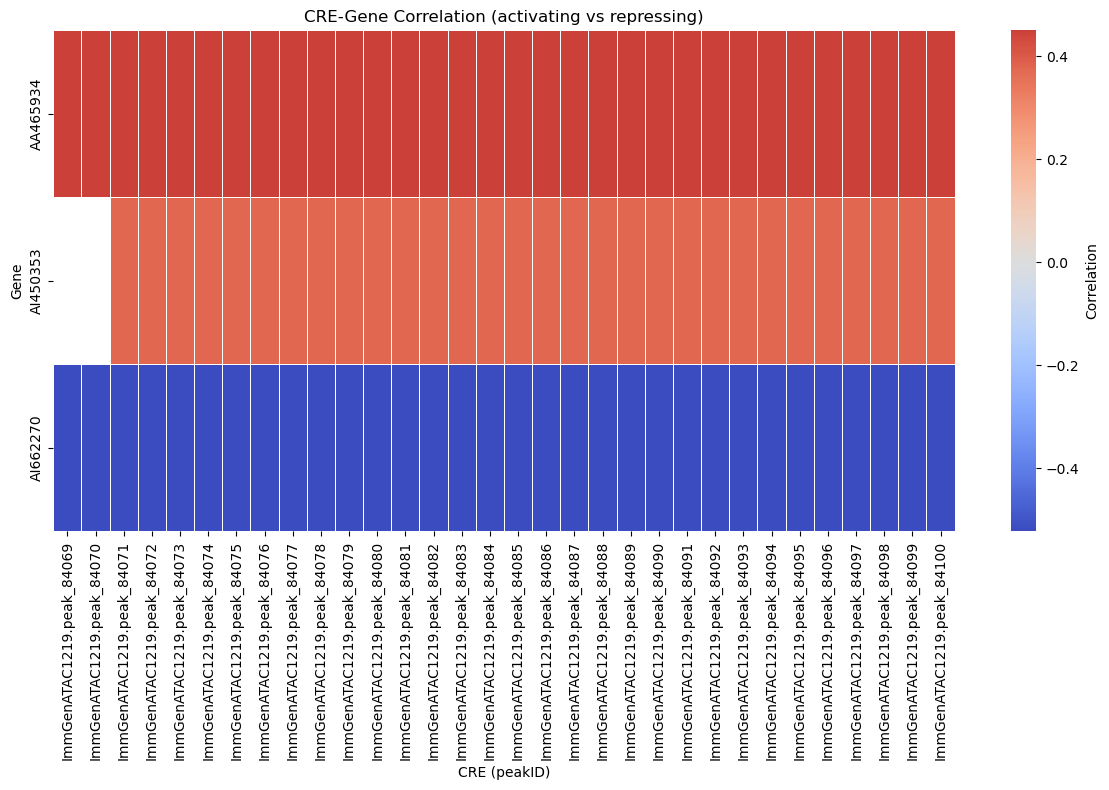

In [131]:
# Pivot Table: Gene vs CRE
heatmap_data = mixed_cre.pivot(index='Gene', columns='peakID', values='correlation')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('CRE-Gene Correlation (activating vs repressing)')
plt.xlabel('CRE (peakID)')
plt.ylabel('Gene')
plt.tight_layout()
plt.savefig("figures/Heatmap_both_activating_repressing_CREs_TSS", dpi=300, bbox_inches='tight')
plt.show()

In [132]:
conflicting_CREs = mixed_cre.groupby('peakID').filter(
    lambda x: (x['correlation'] > 0.3).any() and (x['correlation'] < -0.3).any())

G = nx.Graph()

for _, row in conflicting_CREs.iterrows():
    cre = row['peakID']
    gene = row['Gene']
    corr = row['correlation']

    G.add_node(cre, type='CRE')
    G.add_node(gene, type='Gene')
    G.add_edge(cre, gene, weight=abs(corr), sign='pos' if corr > 0 else 'neg')

pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

node_x, node_y, node_text, node_color = [], [], [], []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append('skyblue' if G.nodes[node]['type'] == 'Gene' else 'tomato')

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    textposition='top center',
    marker=dict(
        color=node_color,
        size=12,
        line=dict(width=1, color='black')))

edge_traces = []
for u, v, data in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    color = 'red' if data['sign'] == 'neg' else 'green'
    edge_trace = go.Scatter(
        x=[x0, x1],
        y=[y0, y1],
        line=dict(width=1, color=color),
        hoverinfo='none',
        mode='lines')
    edge_traces.append(edge_trace)

fig = go.Figure(data=edge_traces + [node_trace],
                layout=go.Layout(
                    title='CRE–Gene Regulatory Network (Activating & Repressing)',
                    title_font_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.write_html("figures/CRE-Gene-Regulatory-Network-Activating-Repressing.html")
fig.show()

### i) Does CRE clustering change if one includes the effect direction on gene expression?

In [133]:
CREs_ID_for_BCell_specific_genes_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean
27477,ImmGenATAC1219.peak_27478,BC026585,chr1,0.681429
27478,ImmGenATAC1219.peak_27479,BC026585,chr1,1.417143
27479,ImmGenATAC1219.peak_27480,BC026585,chr1,1.890000
27480,ImmGenATAC1219.peak_27481,BC026585,chr1,0.897143
27481,ImmGenATAC1219.peak_27482,BC026585,chr1,1.416429


In [134]:
CREs_ID_for_BCell_specific_genes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 27477 to 505790
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  2175 non-null   object 
 1   Gene                   2175 non-null   object 
 2   chrom                  2175 non-null   object 
 3   Bcell_ATAC_mean        2175 non-null   float64
dtypes: float64(1), object(3)
memory usage: 85.0+ KB


In [135]:
activating_CREs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 27477 to 505790
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  1702 non-null   object 
 1   Gene                   1702 non-null   object 
 2   chrom                  1702 non-null   object 
 3   Bcell_ATAC_mean        1702 non-null   float64
 4   Type                   1702 non-null   object 
dtypes: float64(1), object(4)
memory usage: 79.8+ KB


In [136]:
repressing_CREs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 84059 to 397099
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  473 non-null    object 
 1   Gene                   473 non-null    object 
 2   chrom                  473 non-null    object 
 3   Bcell_ATAC_mean        473 non-null    float64
 4   Type                   473 non-null    object 
dtypes: float64(1), object(4)
memory usage: 22.2+ KB


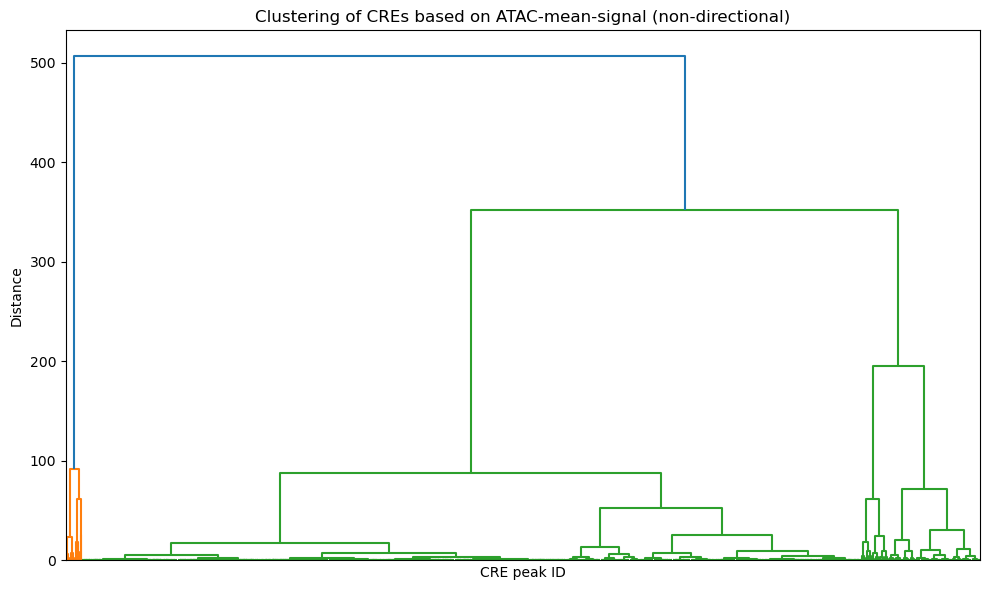

In [137]:
atac_values = CREs_ID_for_BCell_specific_genes_df[['Bcell_ATAC_mean']]

linkage_matrix = linkage(atac_values, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, no_labels=True, leaf_rotation=90)
plt.title("Clustering of CREs based on ATAC-mean-signal (non-directional)")
plt.xlabel("CRE peak ID")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig("figures/Clustering_CREs_non_directional", dpi=300, bbox_inches='tight')
plt.show()


In [138]:
CREs_all_df = CREs_ID_for_BCell_specific_genes_df.copy()

CREs_all_df['Type'] = 'neutral'  

CREs_all_df.loc[CREs_all_df['ImmGenATAC1219.peakID'].isin(activating_CREs_df['ImmGenATAC1219.peakID']),'Type'] = 'activating'
CREs_all_df.loc[CREs_all_df['ImmGenATAC1219.peakID'].isin(repressing_CREs_df['ImmGenATAC1219.peakID']),'Type'] = 'repressing'

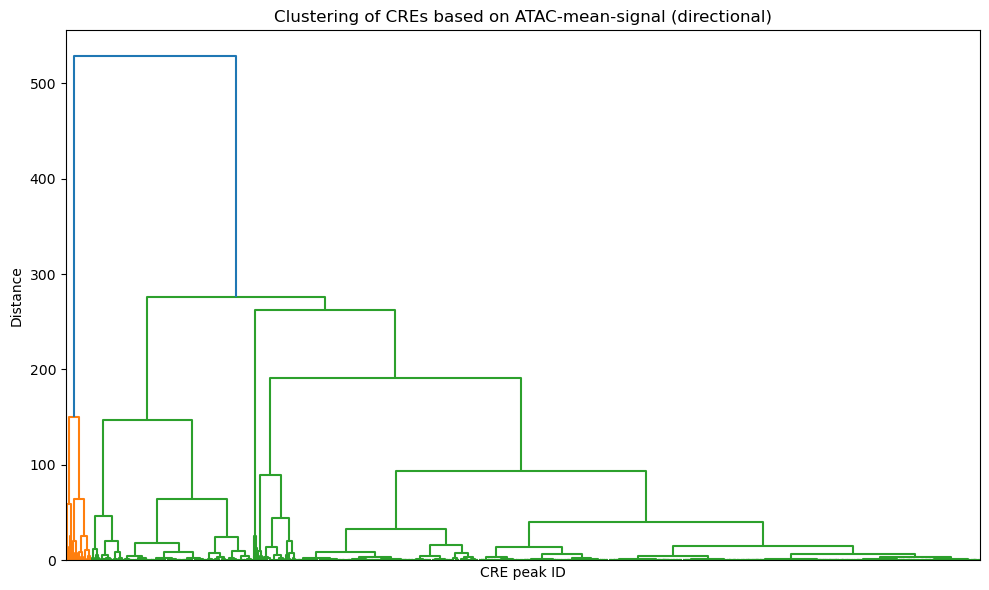

In [139]:
CREs_all_df['direction'] = CREs_all_df['Type'].map({'activating': 1, 'repressing': -1})

CREs_all_df['Bcell_ATAC_directional'] = CREs_all_df['Bcell_ATAC_mean'] * CREs_all_df['direction']

atac_signed = CREs_all_df[['Bcell_ATAC_directional']]
atac_signed = atac_signed.replace([np.inf, -np.inf], np.nan).dropna()

linkage_matrix_dir = linkage(atac_signed, method='ward')

# Plot
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_dir, no_labels=True,  leaf_rotation=90, leaf_font_size=8)
plt.title("Clustering of CREs based on ATAC-mean-signal (directional)")
plt.xlabel("CRE peak ID")
plt.ylabel("Distance")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig("figures/Clustering_CREs_directional", dpi=300, bbox_inches='tight')
plt.show()

compare clustering: 

In [140]:
cluster_labels_nondir = fcluster(linkage_matrix, t=7, criterion='maxclust')
cluster_labels_dir = fcluster(linkage_matrix_dir, t=7, criterion='maxclust')

In [141]:
common_index = CREs_all_df.index.intersection(CREs_ID_for_BCell_specific_genes_df.index)
cluster_labels_nondir = cluster_labels_nondir[[i for i, idx in enumerate(CREs_ID_for_BCell_specific_genes_df.index) if idx in common_index]]
cluster_labels_dir = cluster_labels_dir[[i for i, idx in enumerate(CREs_all_df.index) if idx in common_index]]


In [142]:
ari = adjusted_rand_score(cluster_labels_nondir, cluster_labels_dir)
print(f"Adjusted Rand Index: {ari:.3f}")

Adjusted Rand Index: 0.434


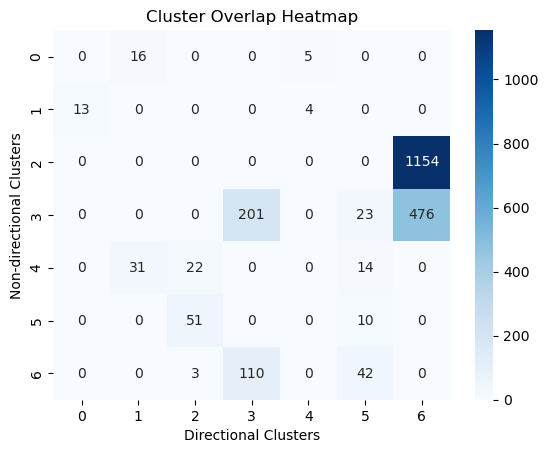

In [143]:
conf_mat = confusion_matrix(cluster_labels_nondir,cluster_labels_dir)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Directional Clusters")
plt.ylabel("Non-directional Clusters")
plt.title("Cluster Overlap Heatmap")
plt.savefig("figures/Cluster_Overlap_Heatmap", dpi=300, bbox_inches='tight')
plt.show()

- clustering is a bit different
- non-directional based on ATAC-signal-peak
- directional based on ATAC-signal-peak multiplied with direction of genregulation 
- ARI= 0.434 -> moderate to good similarity between the two clusterings

## iv. Can one cluster genes based on their expression profiles?

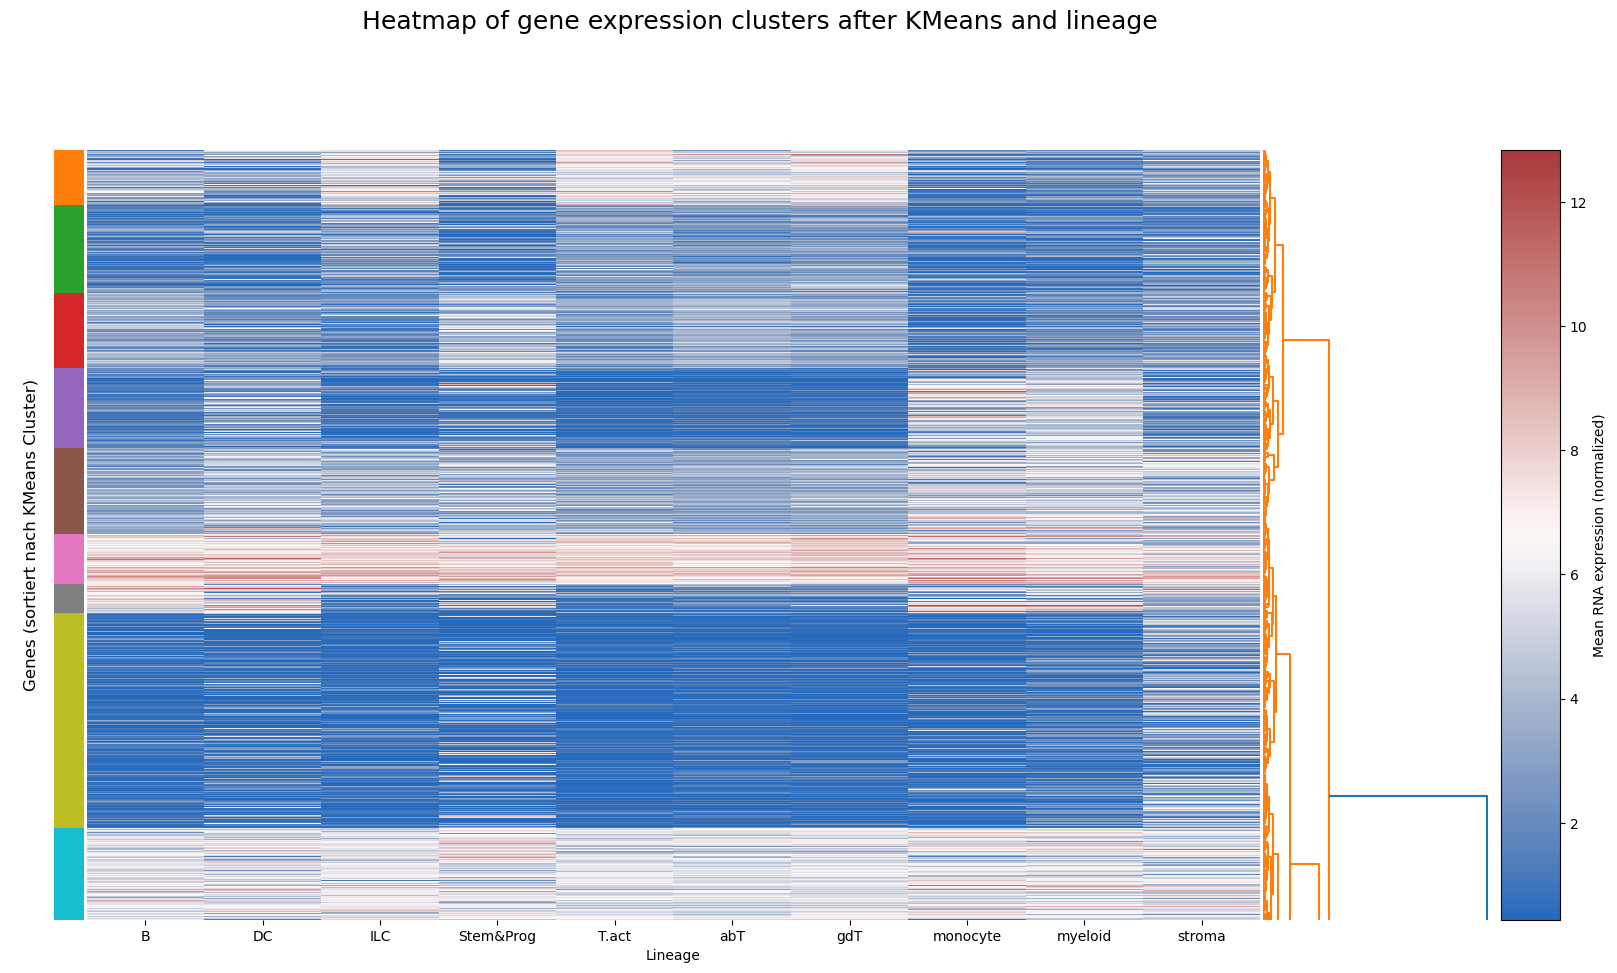

In [144]:
# load QC
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()
QC["Lineage"] = QC["Lineage"].str.strip()
celltype_to_lineage = QC.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# filter cell types 
valid_celltypes = [ct for ct in RNA_filtered.columns if ct in celltype_to_lineage]
RNA_filtered_celltype = RNA_filtered[valid_celltypes]
lineages = [celltype_to_lineage[ct] for ct in valid_celltypes]
RNA_filtered_celltype.columns = lineages
RNA_grouped = RNA_filtered_celltype.groupby(axis=1, level=0).mean()

# cluster label
RNA_grouped["cluster"] = labels_9_RNA_filtered

# sort clusters
RNA_sorted = RNA_grouped.sort_values("cluster")
heatmap_data = RNA_sorted.drop(columns="cluster")

# colors
cluster_palette = sns.color_palette("tab10", 10)
row_colors = [cluster_palette[i] for i in RNA_sorted["cluster"]]

# calculate dendrogram
linkage_genes = sch.linkage(heatmap_data, method='ward')

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 5, width_ratios=[0.7, 0.5, 20, 4, 1], wspace=0.01)

ax_label = fig.add_subplot(gs[0])
ax_label.axis('off')
ax_label.text(0.5, 0.5, "Genes (sortiert nach KMeans Cluster)", rotation=90,
              va='center', ha='center', fontsize=12)

# cluster bar
ax_cluster = fig.add_subplot(gs[1])
ax_cluster.set_xlim(0, 1)
ax_cluster.set_ylim(0, heatmap_data.shape[0])
ax_cluster.axis('off')
for y, color in enumerate(row_colors):
    ax_cluster.add_patch(plt.Rectangle((0, y), 1, 1, facecolor=color, edgecolor='none'))
ax_cluster.invert_yaxis()

# Heatmap 
ax0 = fig.add_subplot(gs[2])
sns.heatmap(heatmap_data, cmap="vlag", yticklabels=False, xticklabels=True, cbar=False, ax=ax0)
ax0.set_xlabel("Lineage")
ax0.set_ylabel("")

# dendrogram
ax1 = fig.add_subplot(gs[3])
sch.dendrogram(linkage_genes, orientation='right', ax=ax1, no_labels=True, color_threshold=None)
ax1.invert_yaxis()
ax1.axis('off')
ax1.set_ylim(ax0.get_ylim())

# colorbar
ax_cb = fig.add_subplot(gs[4])
norm = plt.Normalize(vmin=heatmap_data.values.min(), vmax=heatmap_data.values.max())
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=ax_cb)
cbar.set_label('Mean RNA expression (normalized)')
cbar.ax.yaxis.label.set_rotation(90)

plt.suptitle("Heatmap of gene expression clusters after KMeans and lineage", fontsize=18, y=1.02)
plt.savefig("figures/Heatmap_RNAclusters_lineages.png", dpi=300, bbox_inches="tight")
plt.show()


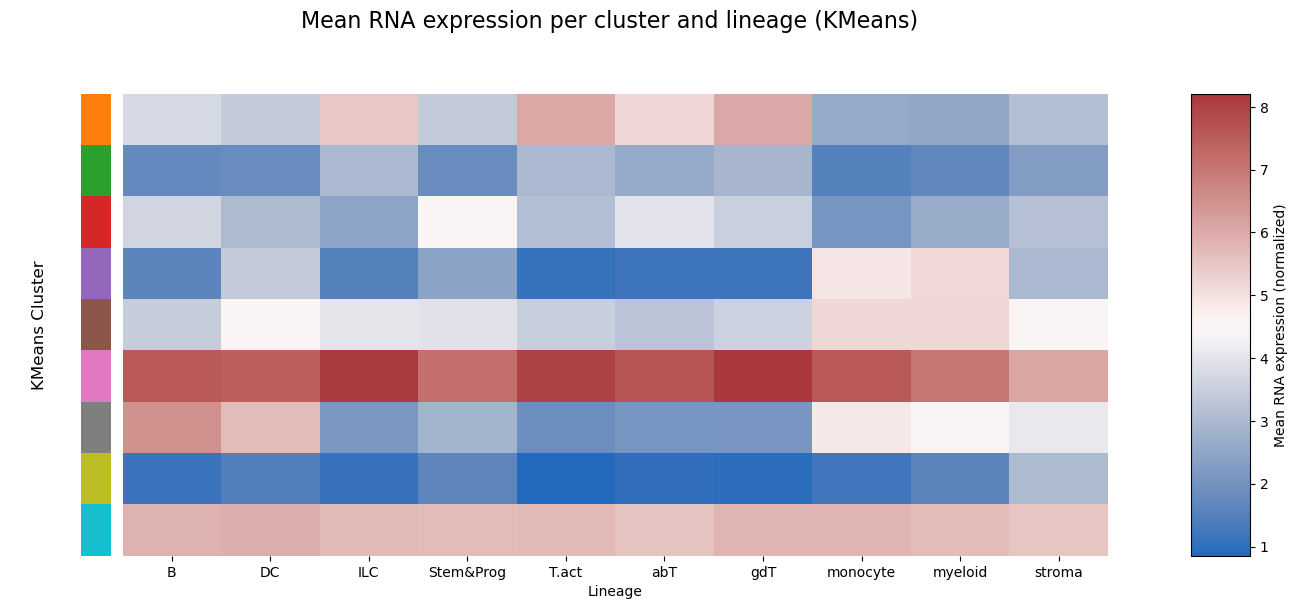

In [145]:
# mean gene expression per cluster
cluster_means = RNA_grouped.groupby("cluster").mean()  # Cluster × Lineage

# colors
cluster_palette = sns.color_palette("tab10", 10)
row_colors = [cluster_palette[i] for i in cluster_means.index]

fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 5, width_ratios=[0.3, 0.15, 5, 0.3, 0.3], wspace=0.05)

# cluster colors
ax_cluster = fig.add_subplot(gs[1])
ax_cluster.set_xlim(0, 1)
ax_cluster.set_ylim(0, cluster_means.shape[0])
ax_cluster.axis('off')
for y, color in enumerate(row_colors):
    ax_cluster.add_patch(plt.Rectangle((0, y), 1, 1, facecolor=color, edgecolor='none'))
ax_cluster.invert_yaxis()

# heatmap
ax_heatmap = fig.add_subplot(gs[2])
sns.heatmap(cluster_means, cmap="vlag", yticklabels=False, xticklabels=True, cbar=False, ax=ax_heatmap)
ax_heatmap.set_xlabel("Lineage")
ax_heatmap.set_ylabel("")

# colorbar
ax_cb = fig.add_subplot(gs[4])
norm = plt.Normalize(vmin=cluster_means.values.min(), vmax=cluster_means.values.max())
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=ax_cb)
cbar.set_label('Mean RNA expression (normalized)')
cbar.ax.yaxis.label.set_rotation(90)


ax_label = fig.add_subplot(gs[0])
ax_label.axis('off')
ax_label.text(0.5, 0.5, "KMeans Cluster", rotation=90, ha='center', va='center', fontsize=12)

plt.suptitle("Mean RNA expression per cluster and lineage (KMeans)", fontsize=16, y=1.02)
plt.savefig("figures/Heatmap_RNAclusters_lineages_mean.png", dpi=300, bbox_inches="tight")
plt.show()



Clustering genes based on their expression levels using KMeans does not yield meaningful results. There are no clearly defined lineages within the clusters — genes are either expressed across all lineages or not at all. Expression patterns remain nearly identical between lineages within each cluster.

### a) Can you determine a specific set of genes for Bcells?

We already generated a list of genes with high chromatin accessibility in B cells, which we labeled as B cell–specific genes. These were identified based on a high ΔR², indicating that chromatin accessibility explains gene expression more strongly in B cells than across all cell types.

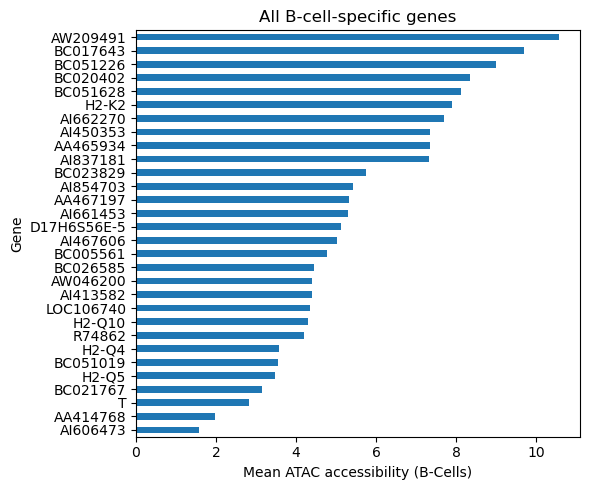

In [146]:
# for all B-Cell-Genes
all_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("All B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

### b) Are there subclusters of special interest?

c:\Users\annal\miniconda3\envs\envBCells1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



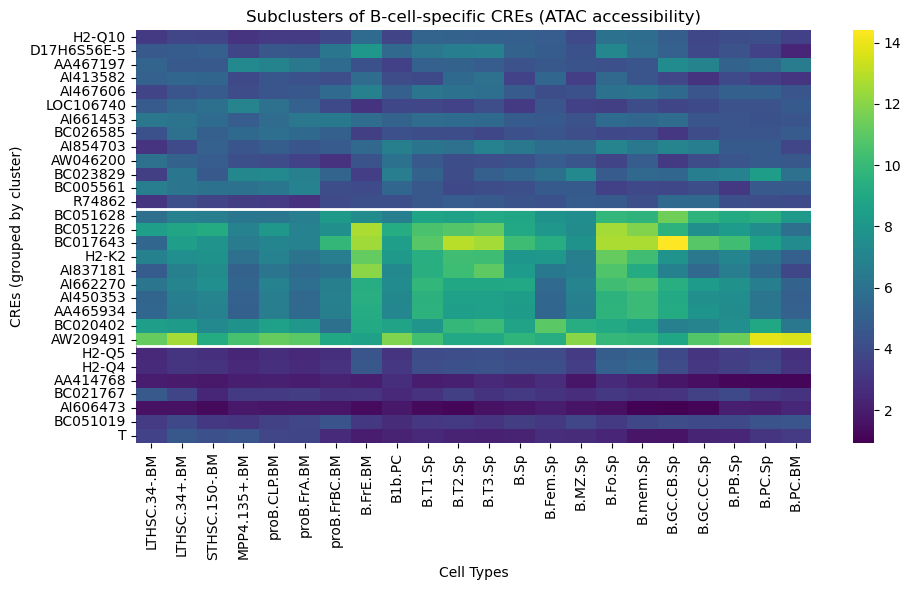

In [ ]:

# Exclude gene LOC105242399
atac_cre_activity_filtered = atac_cre_activity.drop(index='LOC105242399', errors='ignore')

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_trying = kmeans.fit_predict(atac_cre_activity_filtered)

atac_cre_activity_filtered['Cluster'] = labels_trying
atac_cre_sorted = atac_cre_activity_filtered.sort_values('Cluster')

plt.figure(figsize=(10, 6))
ax = sns.heatmap(atac_cre_sorted.drop('Cluster', axis=1), cmap='viridis', yticklabels=True)

# Subcluster boundaries
cluster_changes = np.where(atac_cre_sorted['Cluster'].values[:-1] != atac_cre_sorted['Cluster'].values[1:])[0]
for line_pos in cluster_changes:
    ax.hlines(line_pos + 1, *ax.get_xlim(), colors='white', linewidth=2)

plt.title("Subclusters of B-cell-specific CREs (ATAC accessibility)")
plt.xlabel("Cell Types")
plt.ylabel("CREs (grouped by cluster)")
plt.tight_layout()
plt.savefig("figures/Heatmap_Subcluster_Bcells_Accessibility.png", dpi=300, bbox_inches="tight")
plt.show()


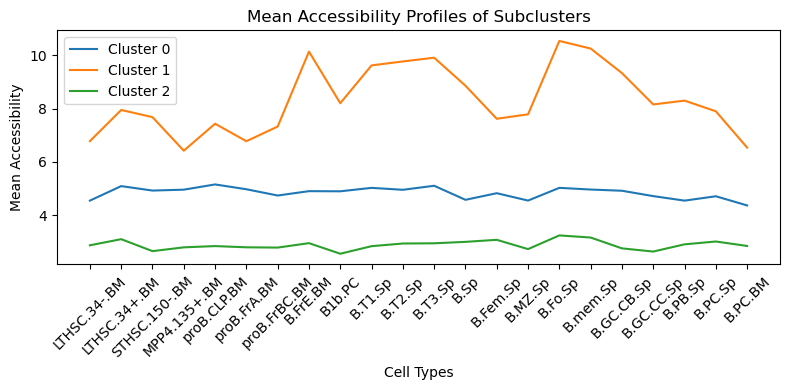

In [148]:
cluster_means = atac_cre_activity_filtered.groupby('Cluster').mean()

plt.figure(figsize=(8,4))
for cluster_id in cluster_means.index:
    plt.plot(cluster_means.columns, cluster_means.loc[cluster_id], label=f'Cluster {cluster_id}')
plt.xticks(rotation=45)
plt.xlabel('Cell Types')
plt.ylabel('Mean Accessibility')
plt.title('Mean Accessibility Profiles of Subclusters')
plt.legend()
plt.tight_layout()
plt.savefig("figures/Lineplot_Subcluster_Bcells_Accessibility.png", dpi=300, bbox_inches="tight")
plt.show()


In [149]:
# Gene im Cluster 1 herausfiltern
cluster_1_genes = atac_cre_activity_filtered[atac_cre_activity_filtered['Cluster'] == 1].index.tolist()

print(f"Number of genes in Cluster 1: {len(cluster_1_genes)}")
print("Genes in Cluster 1:")
for gene in cluster_1_genes:
    print(gene)


Number of genes in Cluster 1: 10
Genes in Cluster 1:
AA465934
AI450353
AI662270
AI837181
AW209491
BC017643
BC020402
BC051226
BC051628
H2-K2


Clustering of B cell–specific genes reveals three clusters that are not clearly distinct in ATAC accessibility across cell types. However, based on mean accessibility profiles, the clusters are well separable. Cluster 1 contains genes with the highest mean ATAC accessibility.

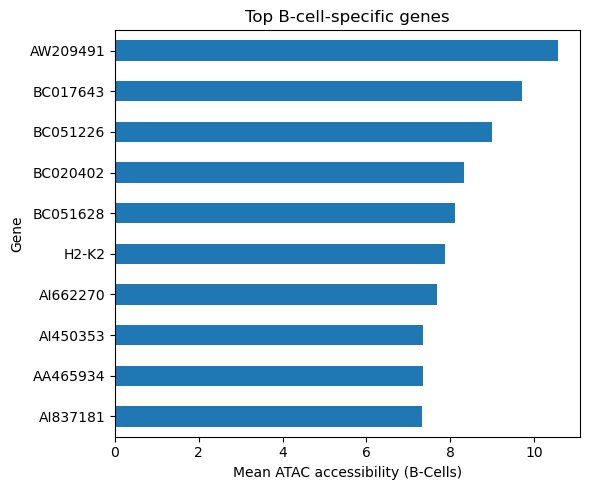

In [150]:
#only for top Genes
top_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("Top B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

In [151]:
# Falls cluster_1_genes eine Liste oder Series ist:
cluster_1_genes_set = set(cluster_1_genes)

# Gene-Namen aus dem Index von top_CREs_BCells
top_CREs_genes_set = set(top_CREs_BCells.index)

# Vergleich
common = top_CREs_genes_set & cluster_1_genes_set
only_in_top_CREs = top_CREs_genes_set - cluster_1_genes_set
only_in_cluster_1 = cluster_1_genes_set - top_CREs_genes_set

# Ausgabe
print(f"Anzahl gemeinsamer Einträge: {len(common)}")
print(f"Nur in top_CREs_BCells: {only_in_top_CREs}")
print(f"Nur in cluster_1_genes: {only_in_cluster_1}")


Anzahl gemeinsamer Einträge: 10
Nur in top_CREs_BCells: set()
Nur in cluster_1_genes: set()


Cluster 1, which includes genes with the highest mean ATAC accessibility, shows a strong overlap with the top B cell–specific genes. This suggests that genes with high accessibility across cell types are also those most strongly associated with B cell–specific regulation.